<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-librairies-nécessaires" data-toc-modified-id="Les-librairies-nécessaires-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les librairies nécessaires</a></span></li><li><span><a href="#La-connexion-à-la-base-de-données-PostgreSQL" data-toc-modified-id="La-connexion-à-la-base-de-données-PostgreSQL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La connexion à la base de données PostgreSQL</a></span></li><li><span><a href="#Création-de-la-table-COMMANDES01" data-toc-modified-id="Création-de-la-table-COMMANDES01-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Création de la table COMMANDES01</a></span><ul class="toc-item"><li><span><a href="#Clé-primaire-pour-la-table-COMMANDES01" data-toc-modified-id="Clé-primaire-pour-la-table-COMMANDES01-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Clé primaire pour la table COMMANDES01</a></span></li><li><span><a href="#Clé-étrangère-référencent-la-colonne-NO_EMPLOYE-de-la-table-EMPLOYES" data-toc-modified-id="Clé-étrangère-référencent-la-colonne-NO_EMPLOYE-de-la-table-EMPLOYES-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Clé étrangère référencent la colonne NO_EMPLOYE de la table EMPLOYES</a></span></li></ul></li></ul></div>

# Les librairies nécessaires

In [2]:
import pandas as pd, numpy as np, seaborn as sns
import warnings 
import os
from matplotlib import pyplot as plt

from datetime import datetime
warnings.filterwarnings(action="ignore")

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=3)

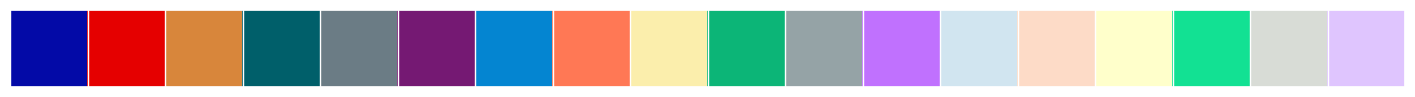

In [3]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

# Lecture du fichier de données

In [7]:
donnees = pd.read_csv("../donnees/AirQualityUCI01.csv",usecols=['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']).dropna()
donnees.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [10]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [9]:
donnees.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [16]:
donnees.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [20]:
(donnees[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']] == -200 ).sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

# Les distributions des variables quantitatives

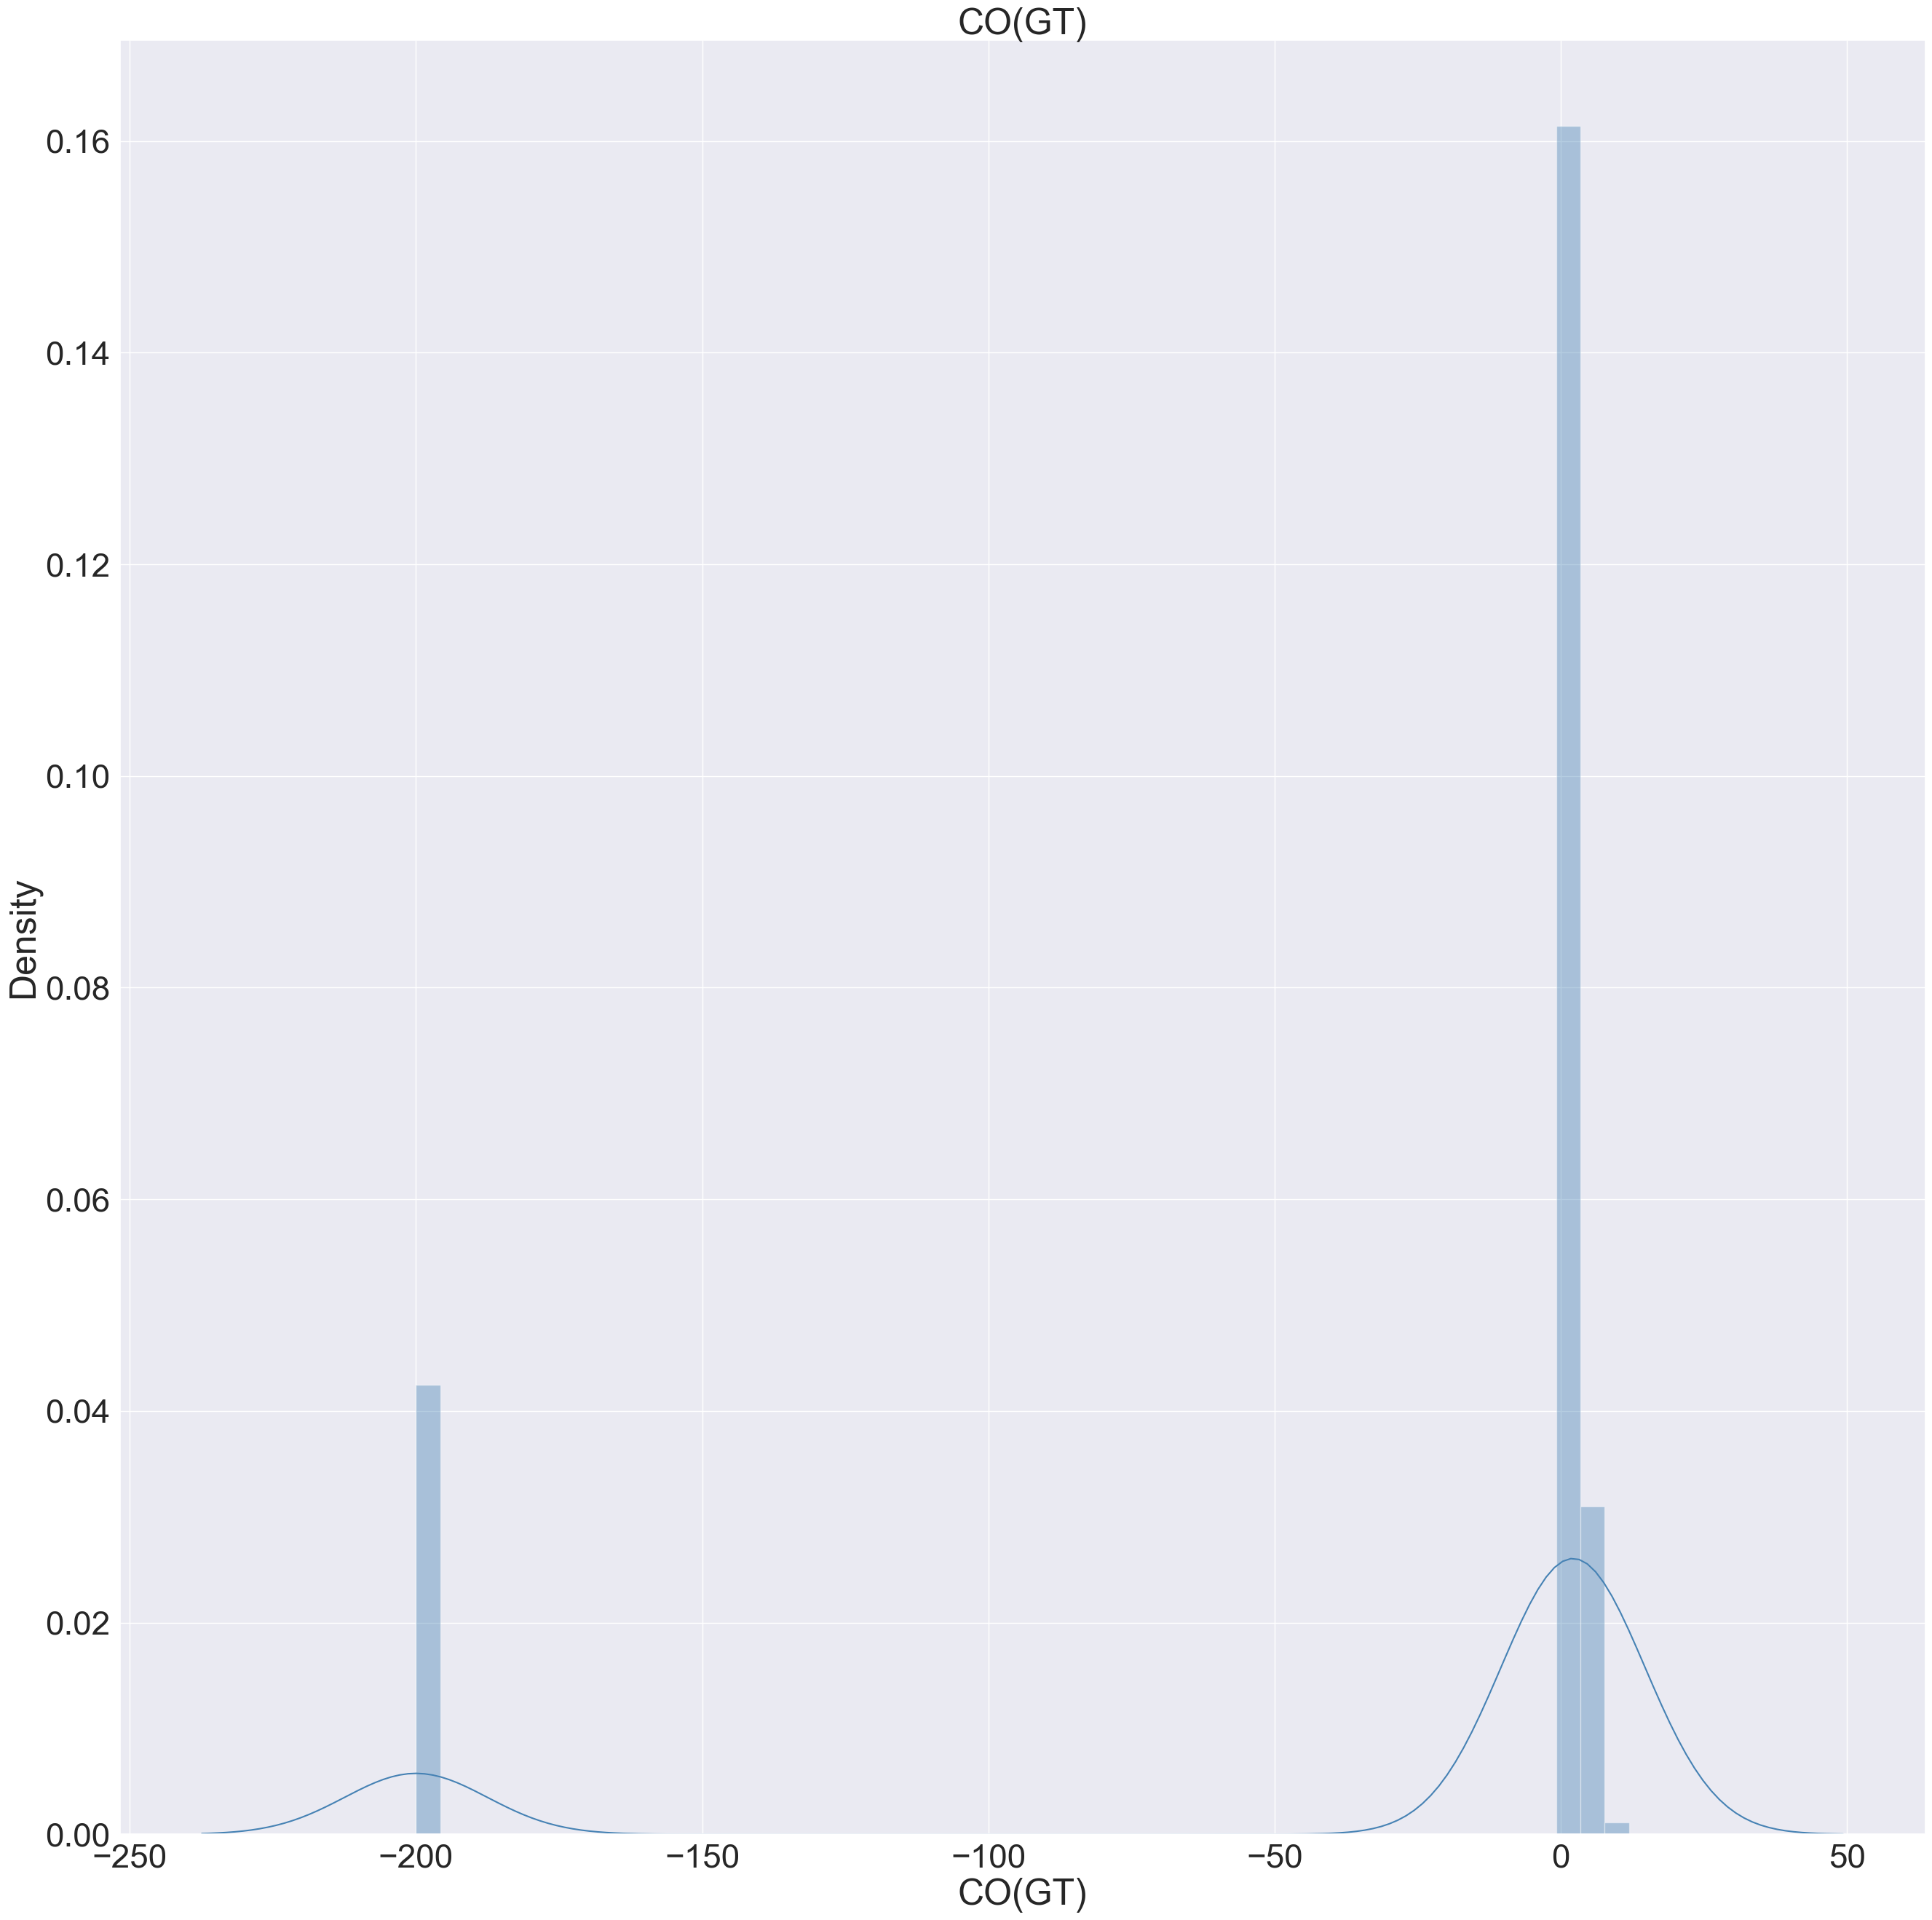

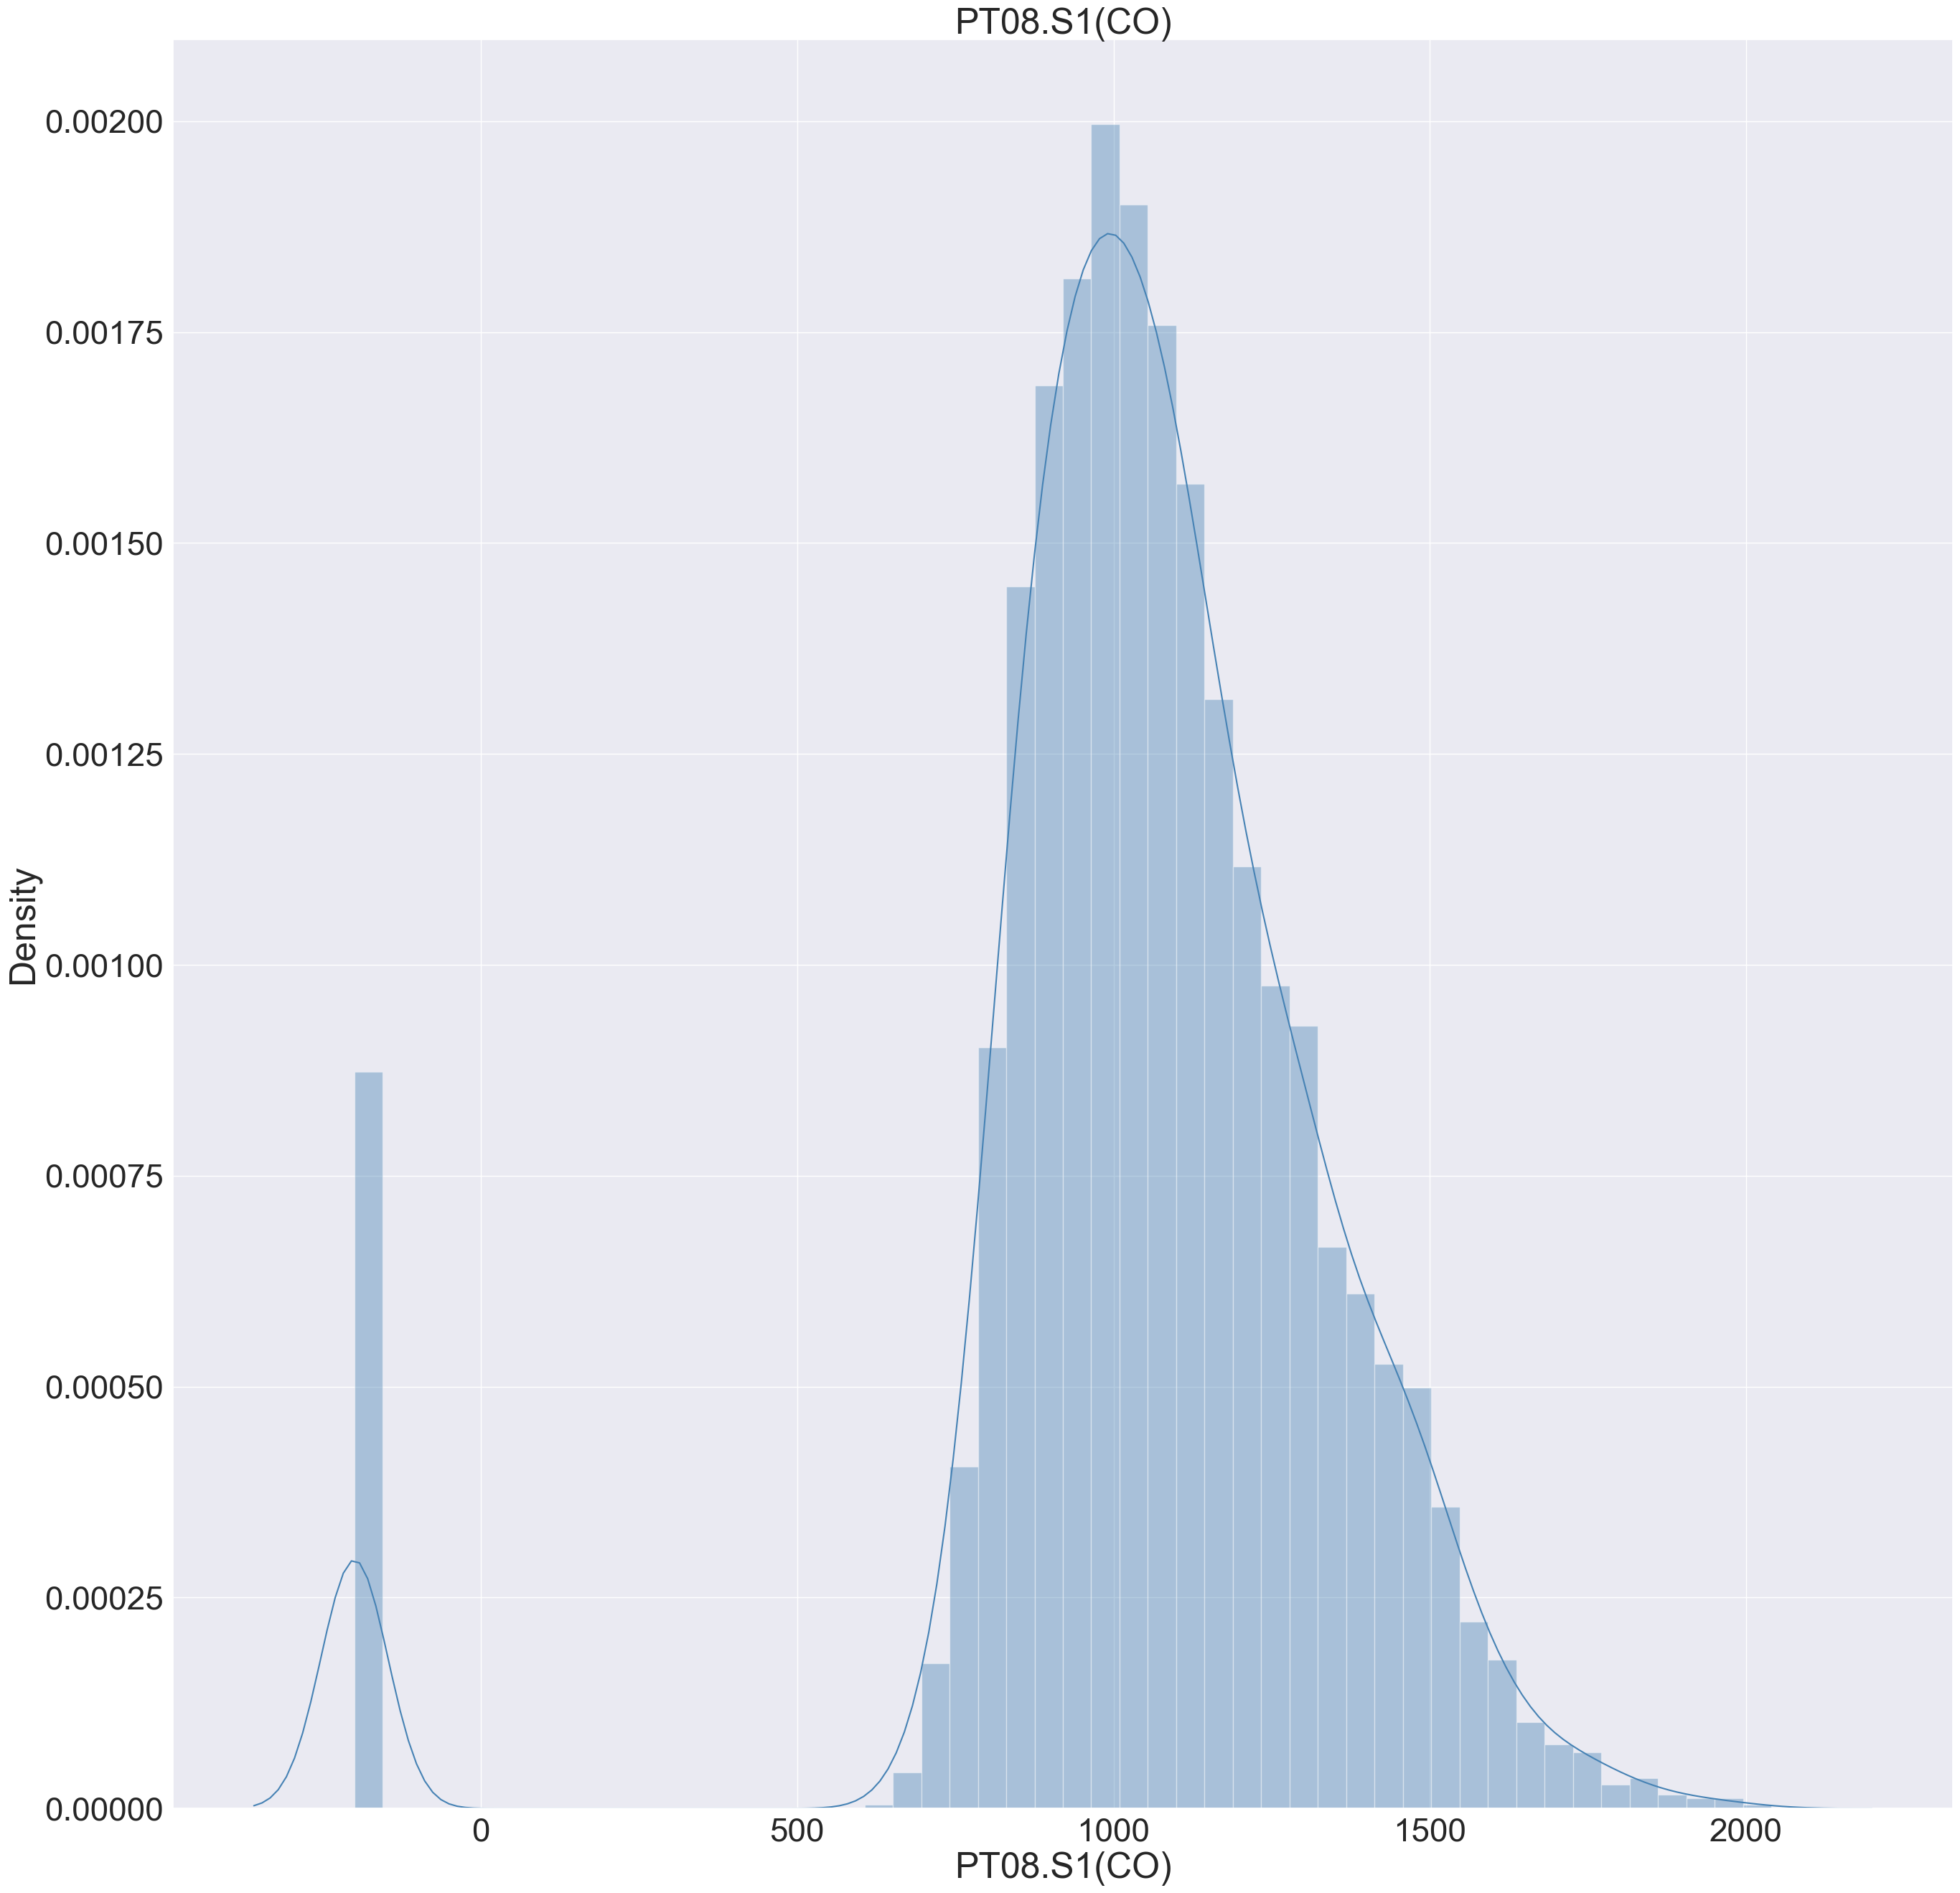

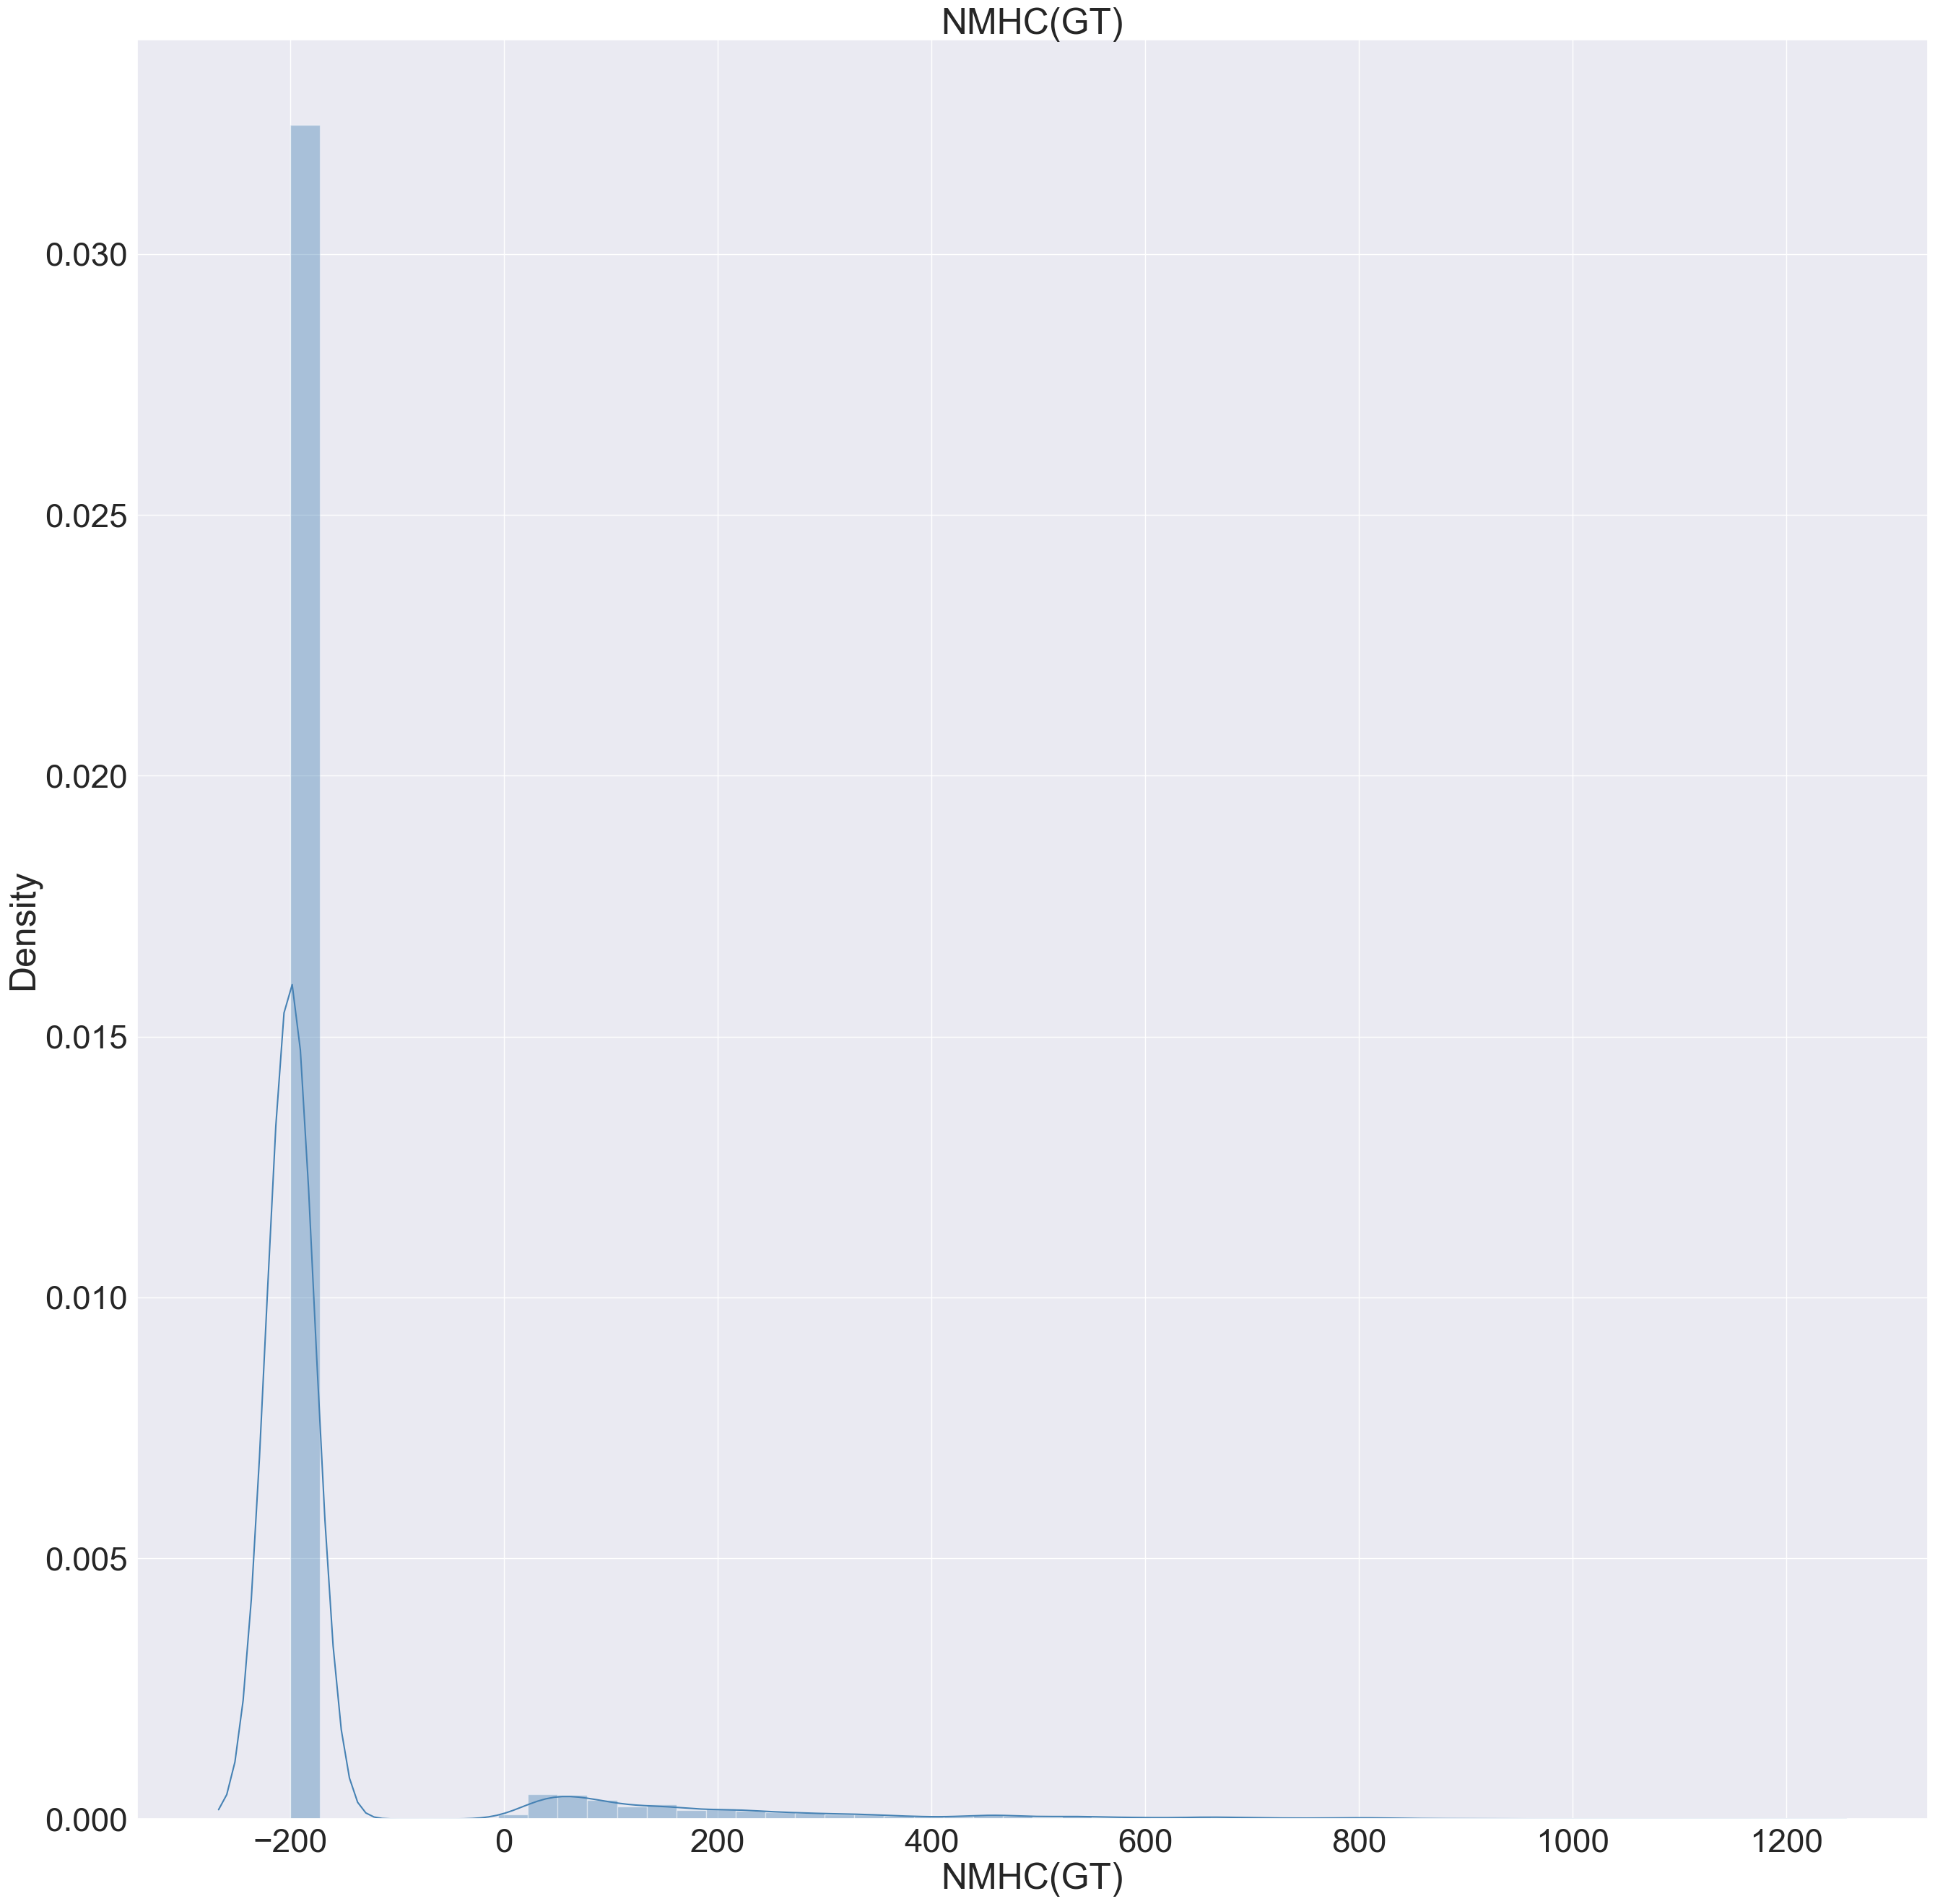

In [31]:
for colonne in ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)']:
    plt.figure(figsize=(32,32))
    plt.title(colonne)
    sns.distplot(donnees[colonne], color="steelblue")
    plt.show()

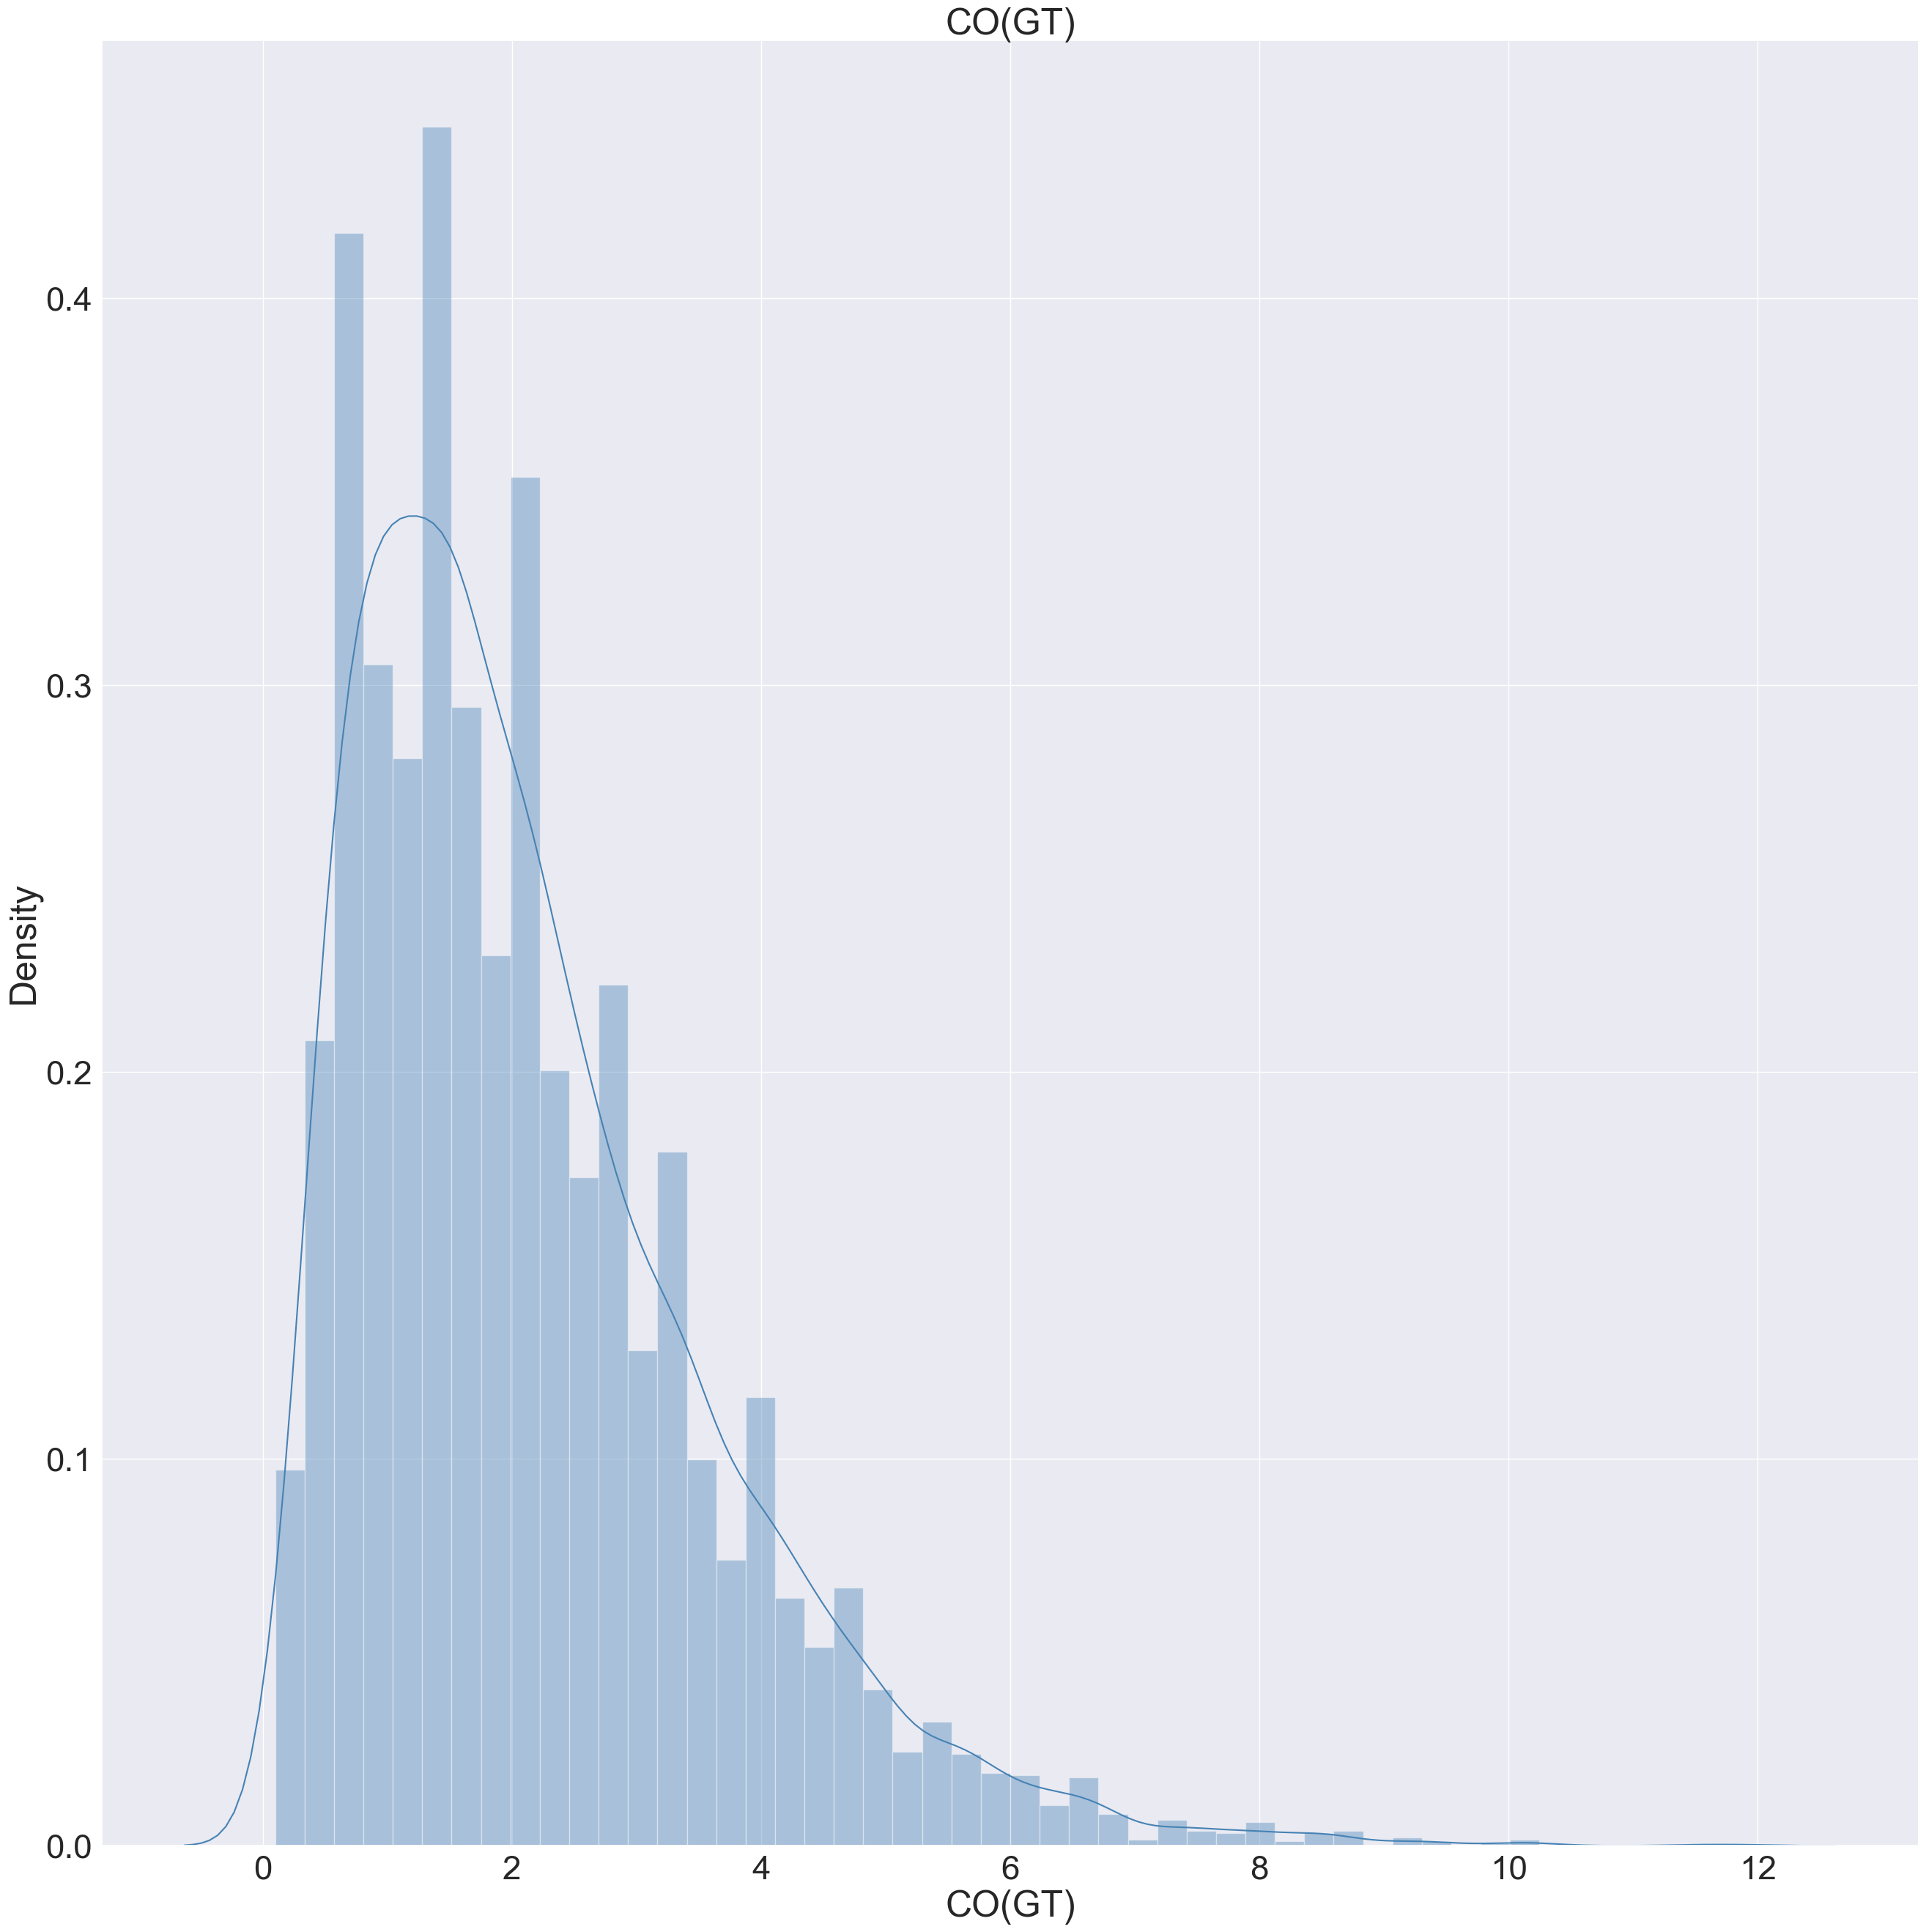

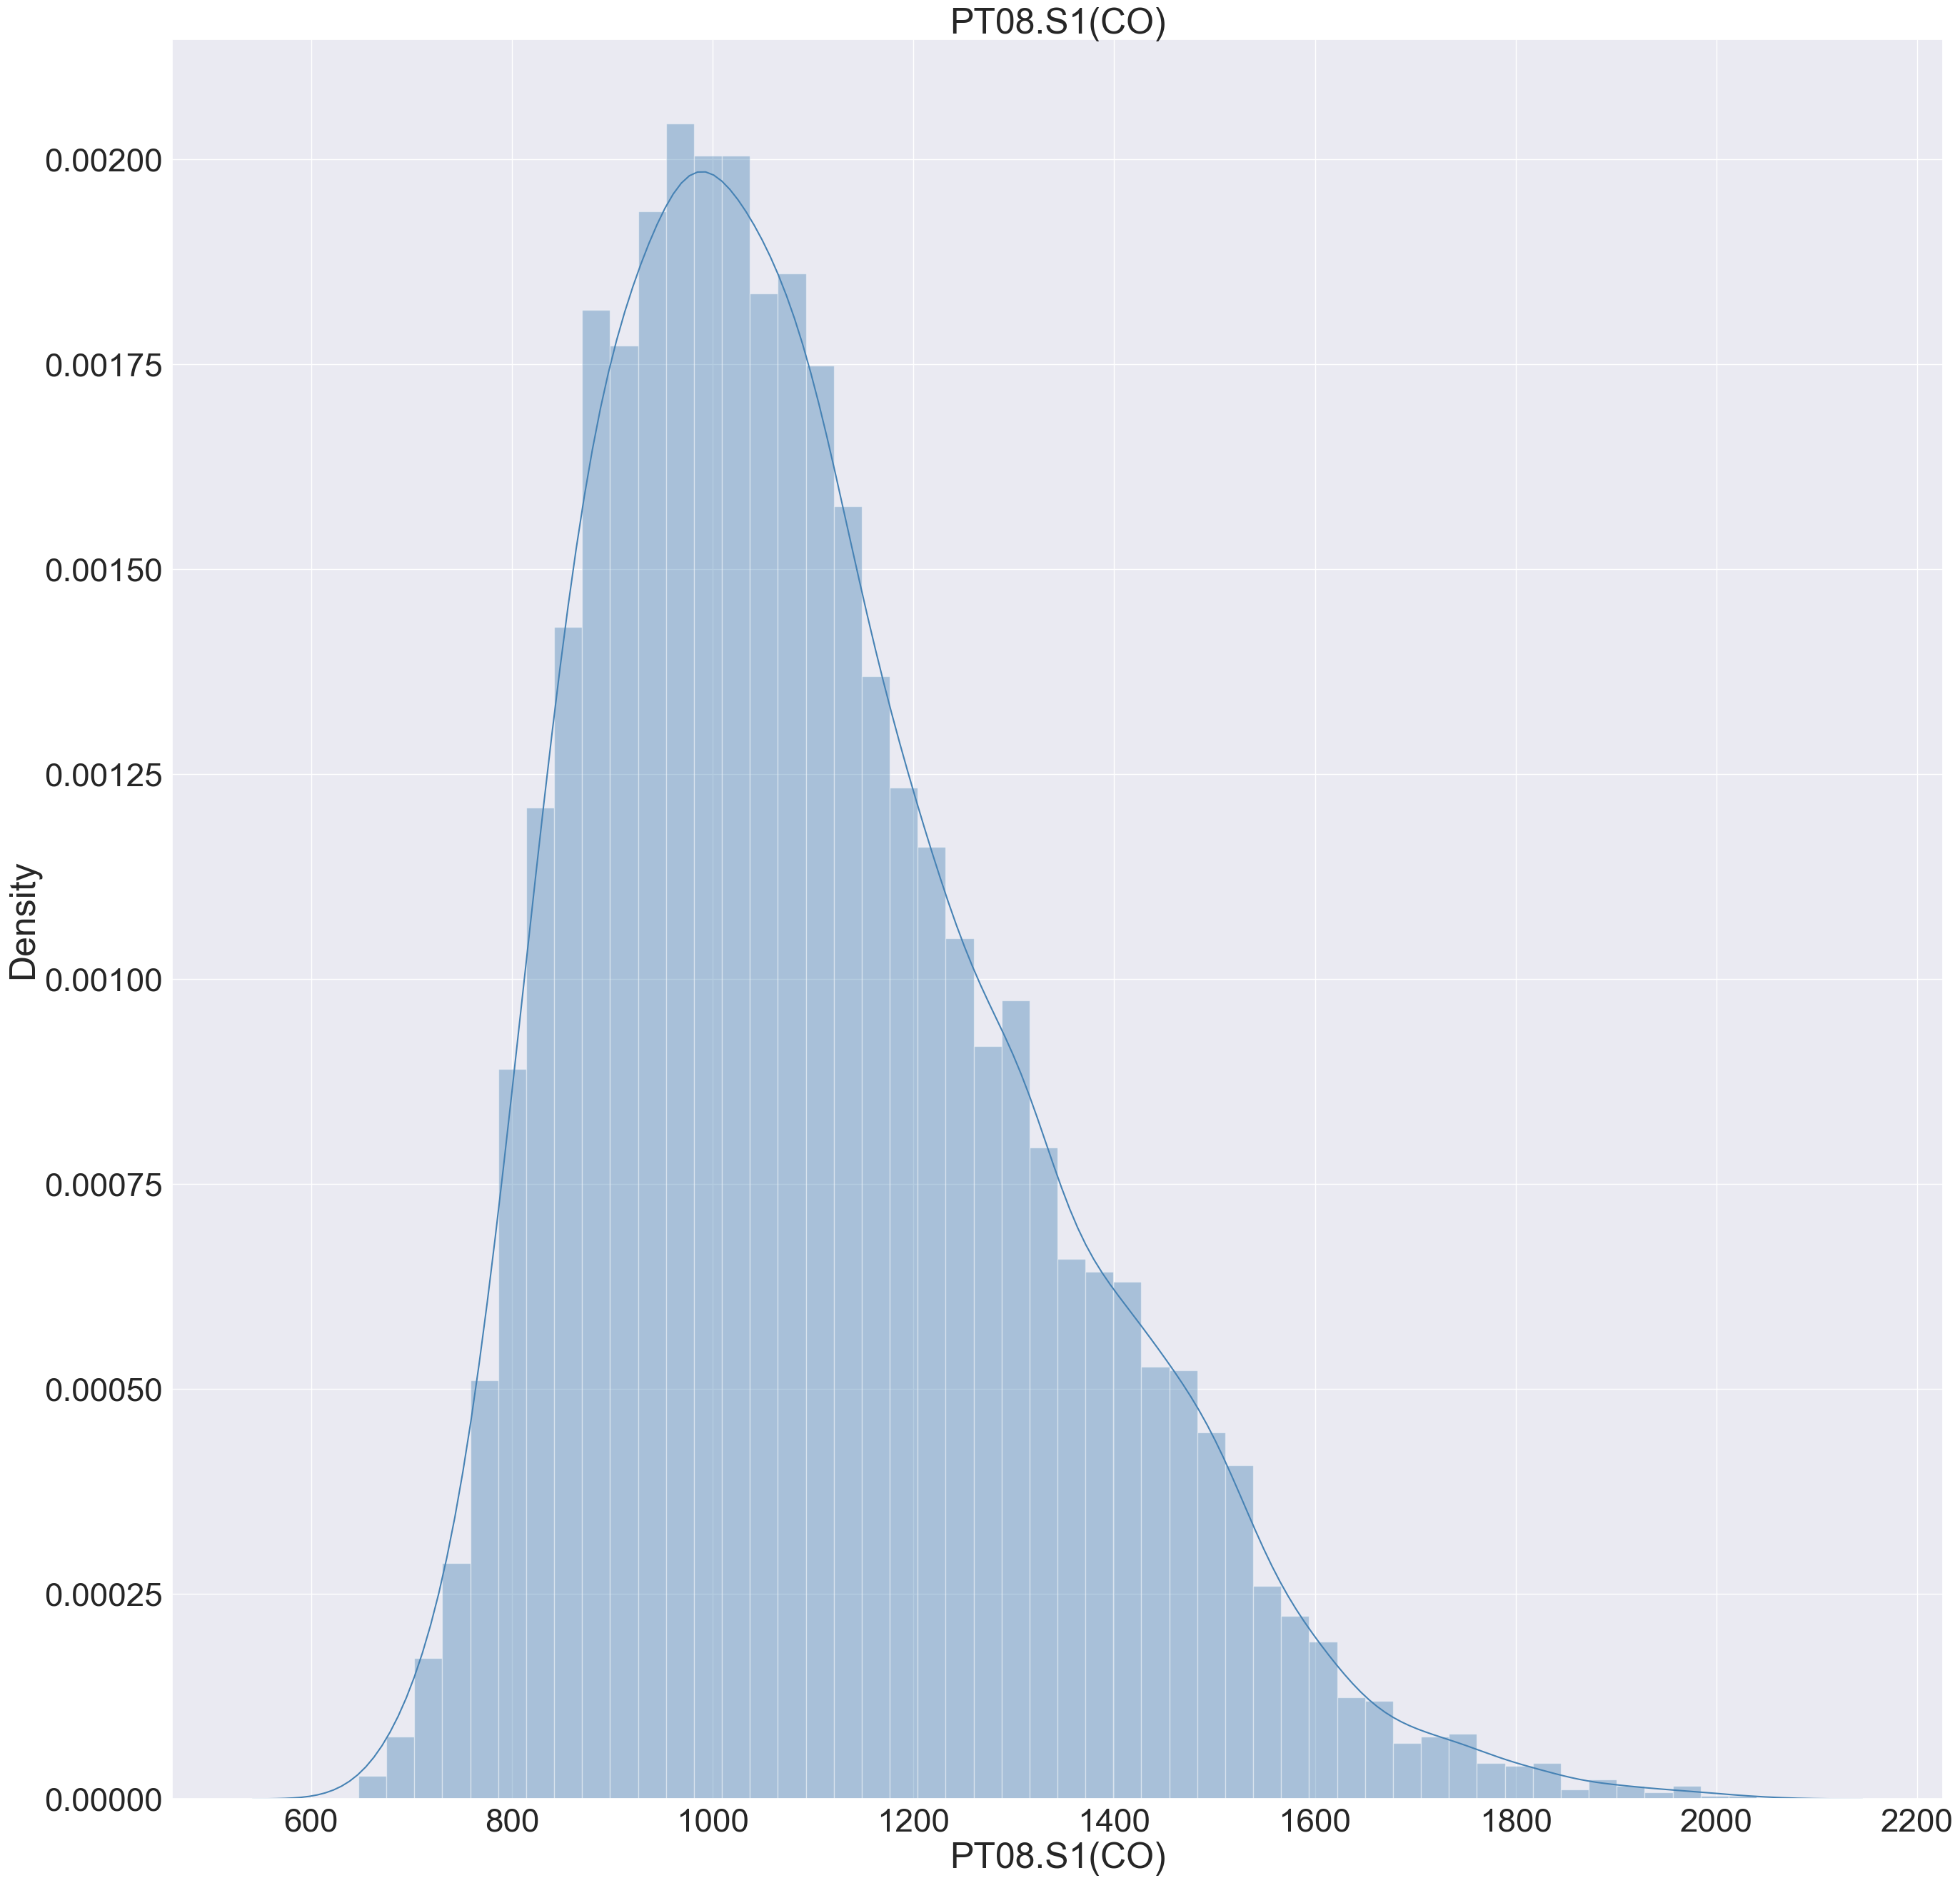

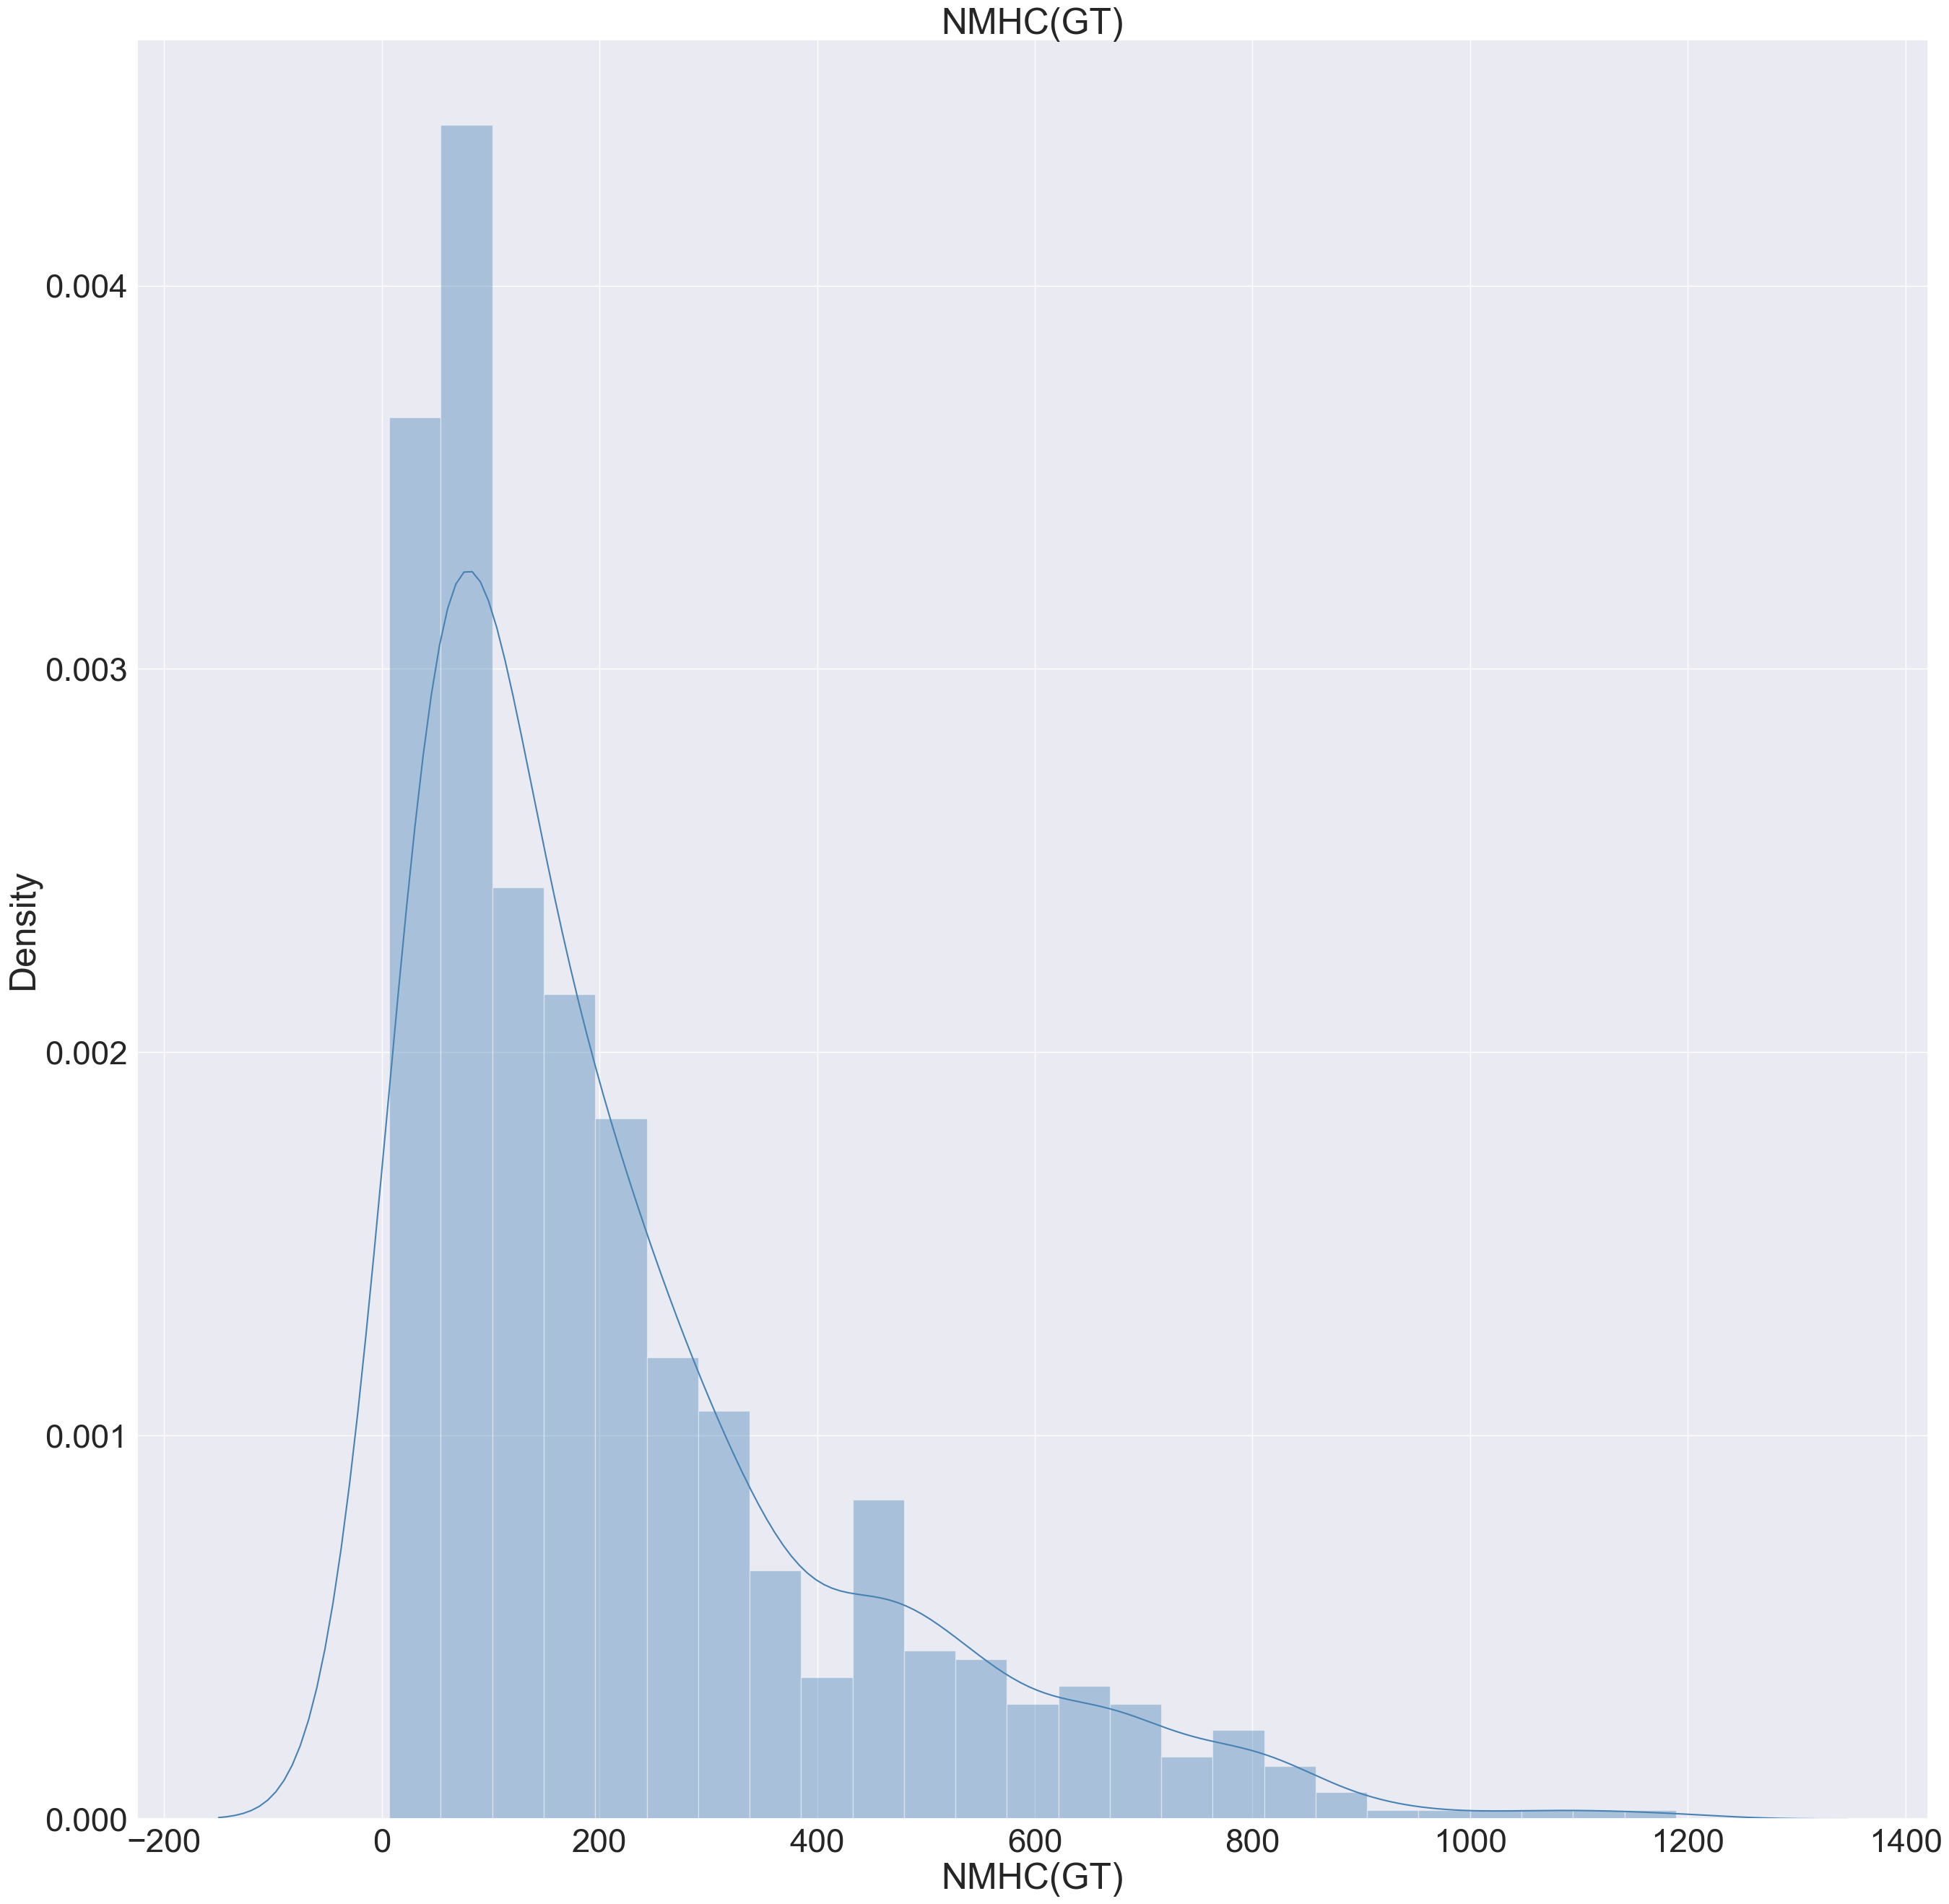

In [22]:
for colonne in ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)']:
    plt.figure(figsize=(32,32))
    plt.title(colonne)
    sns.distplot(donnees.loc[donnees[colonne]!= -200,colonne], color="steelblue")
    plt.show()

# BarPlot

In [24]:
donnees.groupby(['Time'])[['RH', 'AH']].agg(['sum','mean','std']).head(10)

RH                               AH                     
              sum       mean        std        sum      mean        std
Time                                                                   
00.00.00  17016.4  43.631795  55.347514 -3208.0903 -8.225873  42.240804
01.00.00  17948.9  46.022821  52.633879 -2806.4616 -7.196055  39.931872
02.00.00  18682.1  47.902821  51.332204 -2606.8607 -6.684258  38.714895
03.00.00  19398.7  49.740256  49.914029 -2408.2152 -6.174911  37.450909
04.00.00  20101.1  51.541282  48.415086 -2208.8433 -5.663701  36.135884
05.00.00  20364.5  52.216667  48.417194 -2209.7782 -5.666098  36.135418
06.00.00  20314.5  52.088462  50.122366 -2412.1149 -6.184910  37.448896
07.00.00  19905.3  51.039231  49.881132 -2411.4903 -6.183308  37.449224
08.00.00  18824.3  48.267436  49.507370 -2409.9443 -6.179344  37.450029
09.00.00  17595.3  45.116154  45.676485 -2006.1092 -5.143870  34.765247

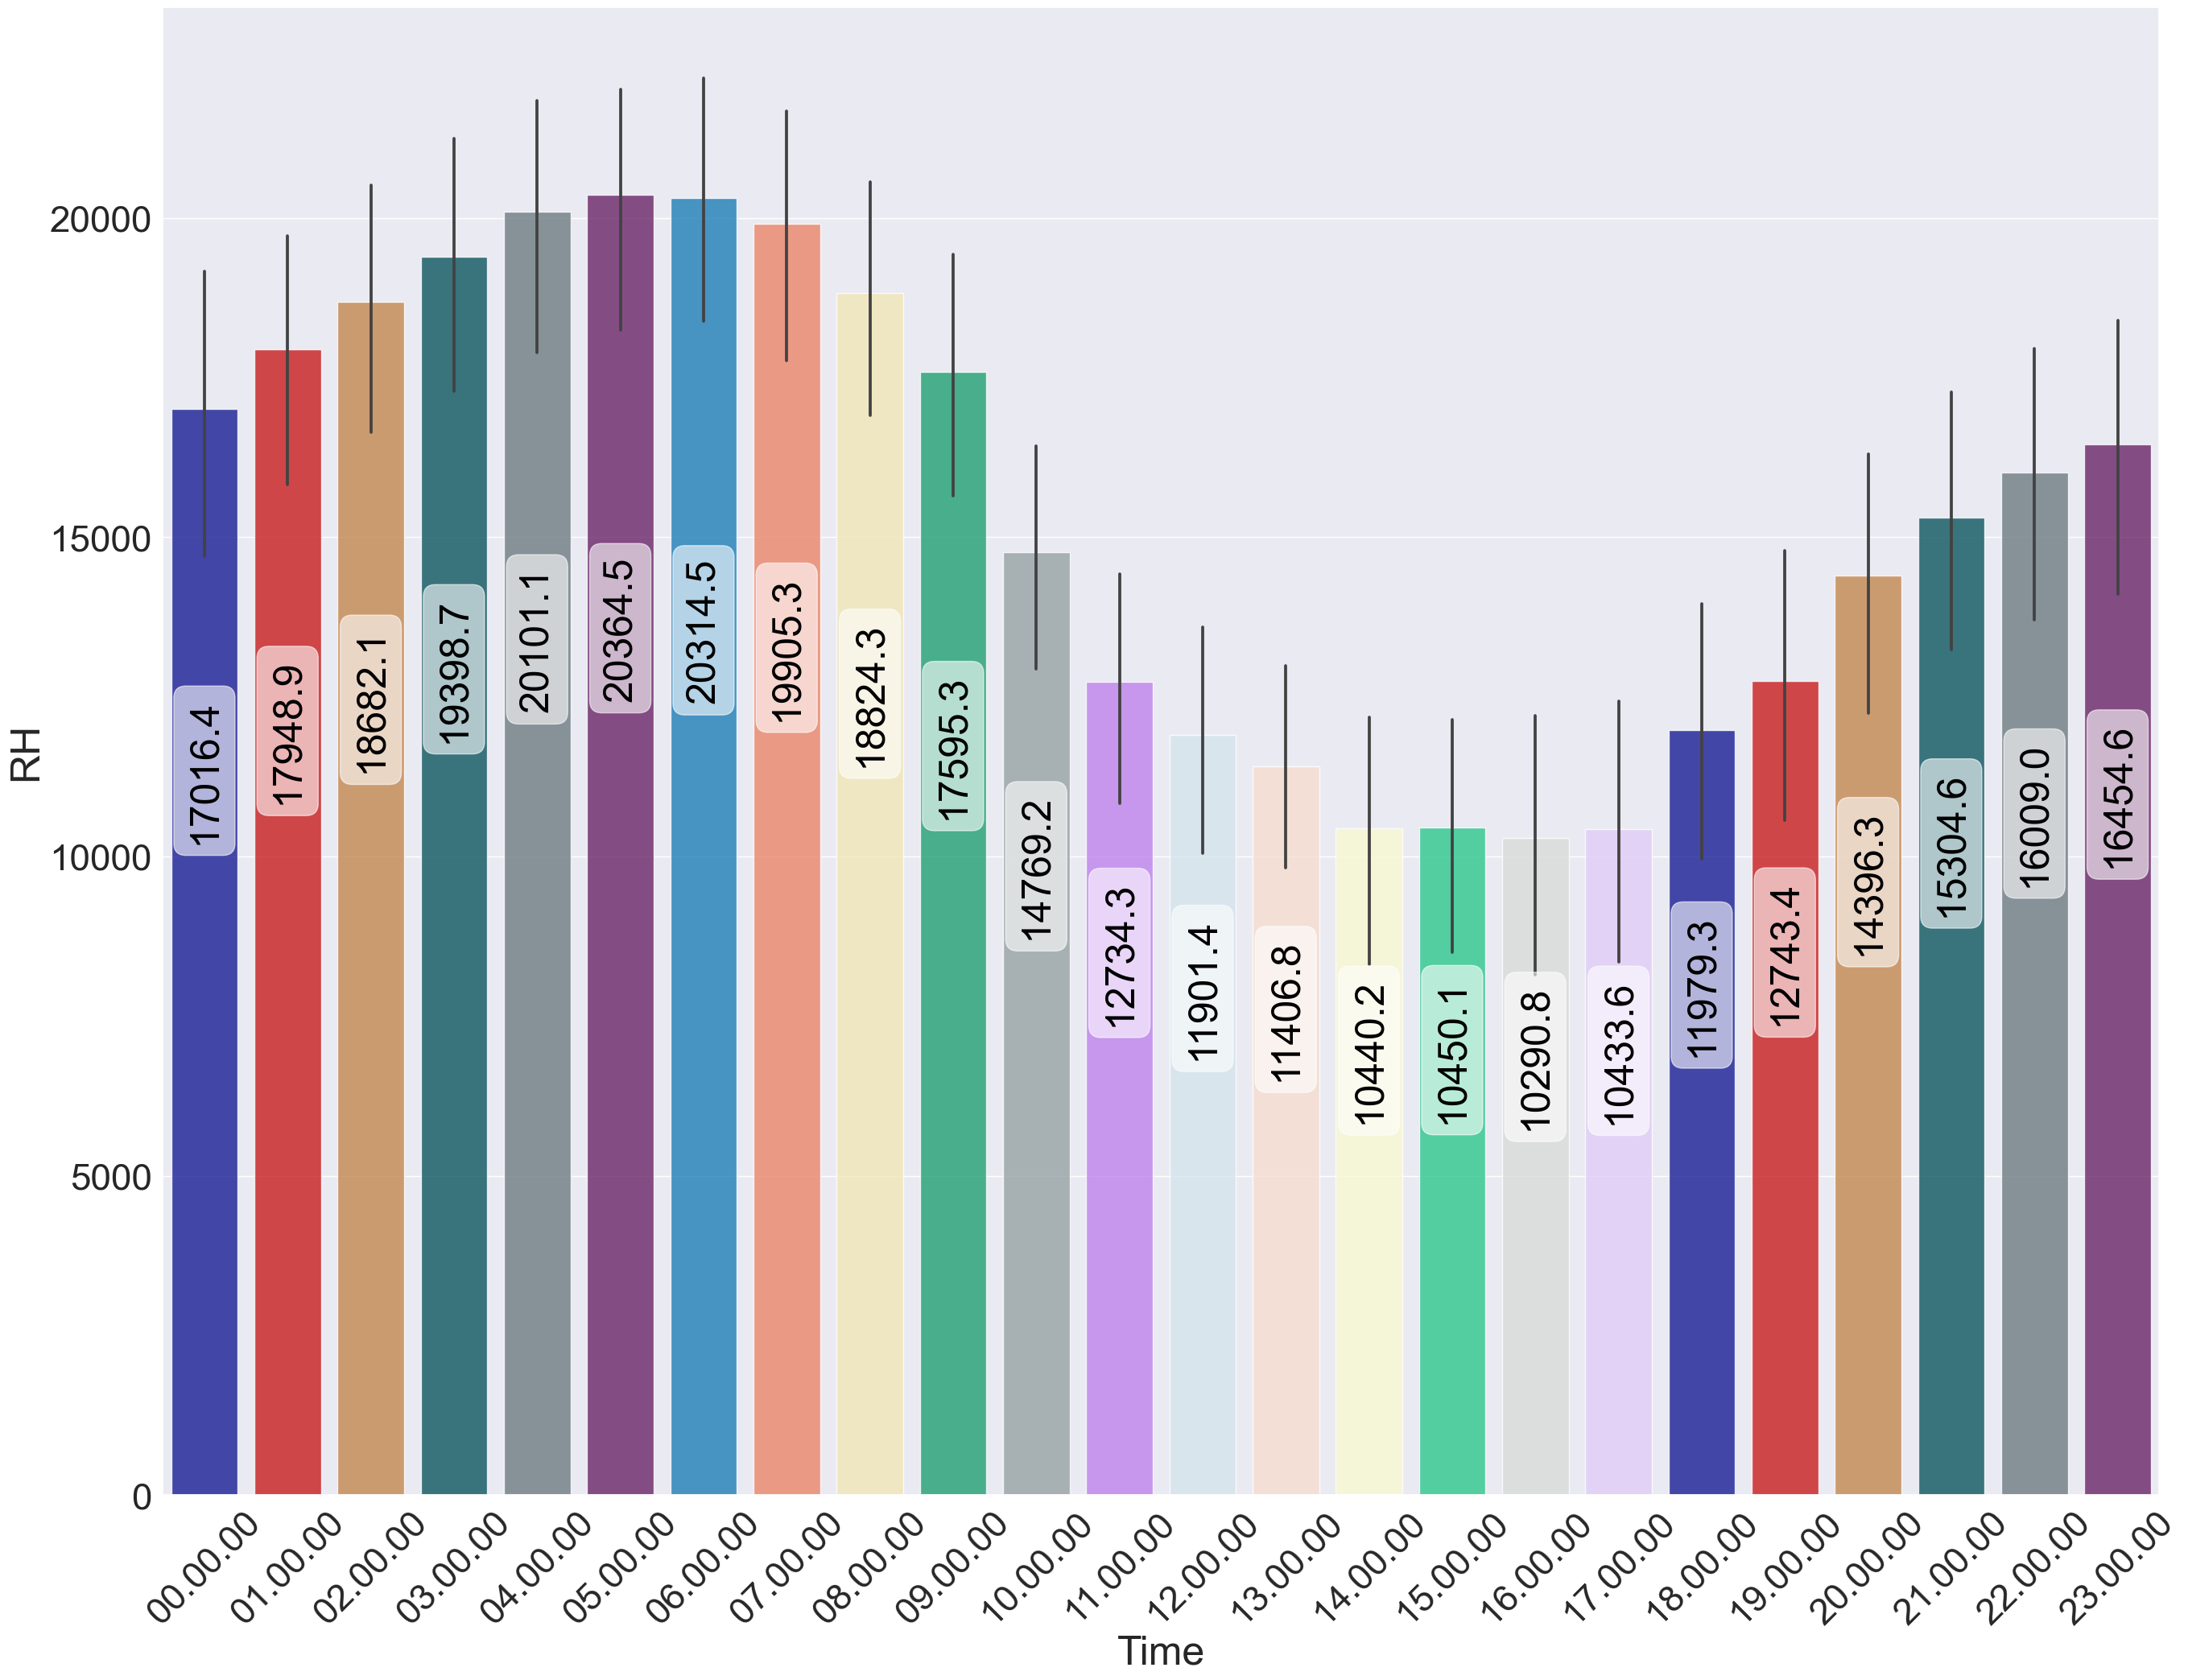

In [26]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='Time',y='RH',data=donnees.sort_values('Time'),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees.groupby('Time').RH.sum().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

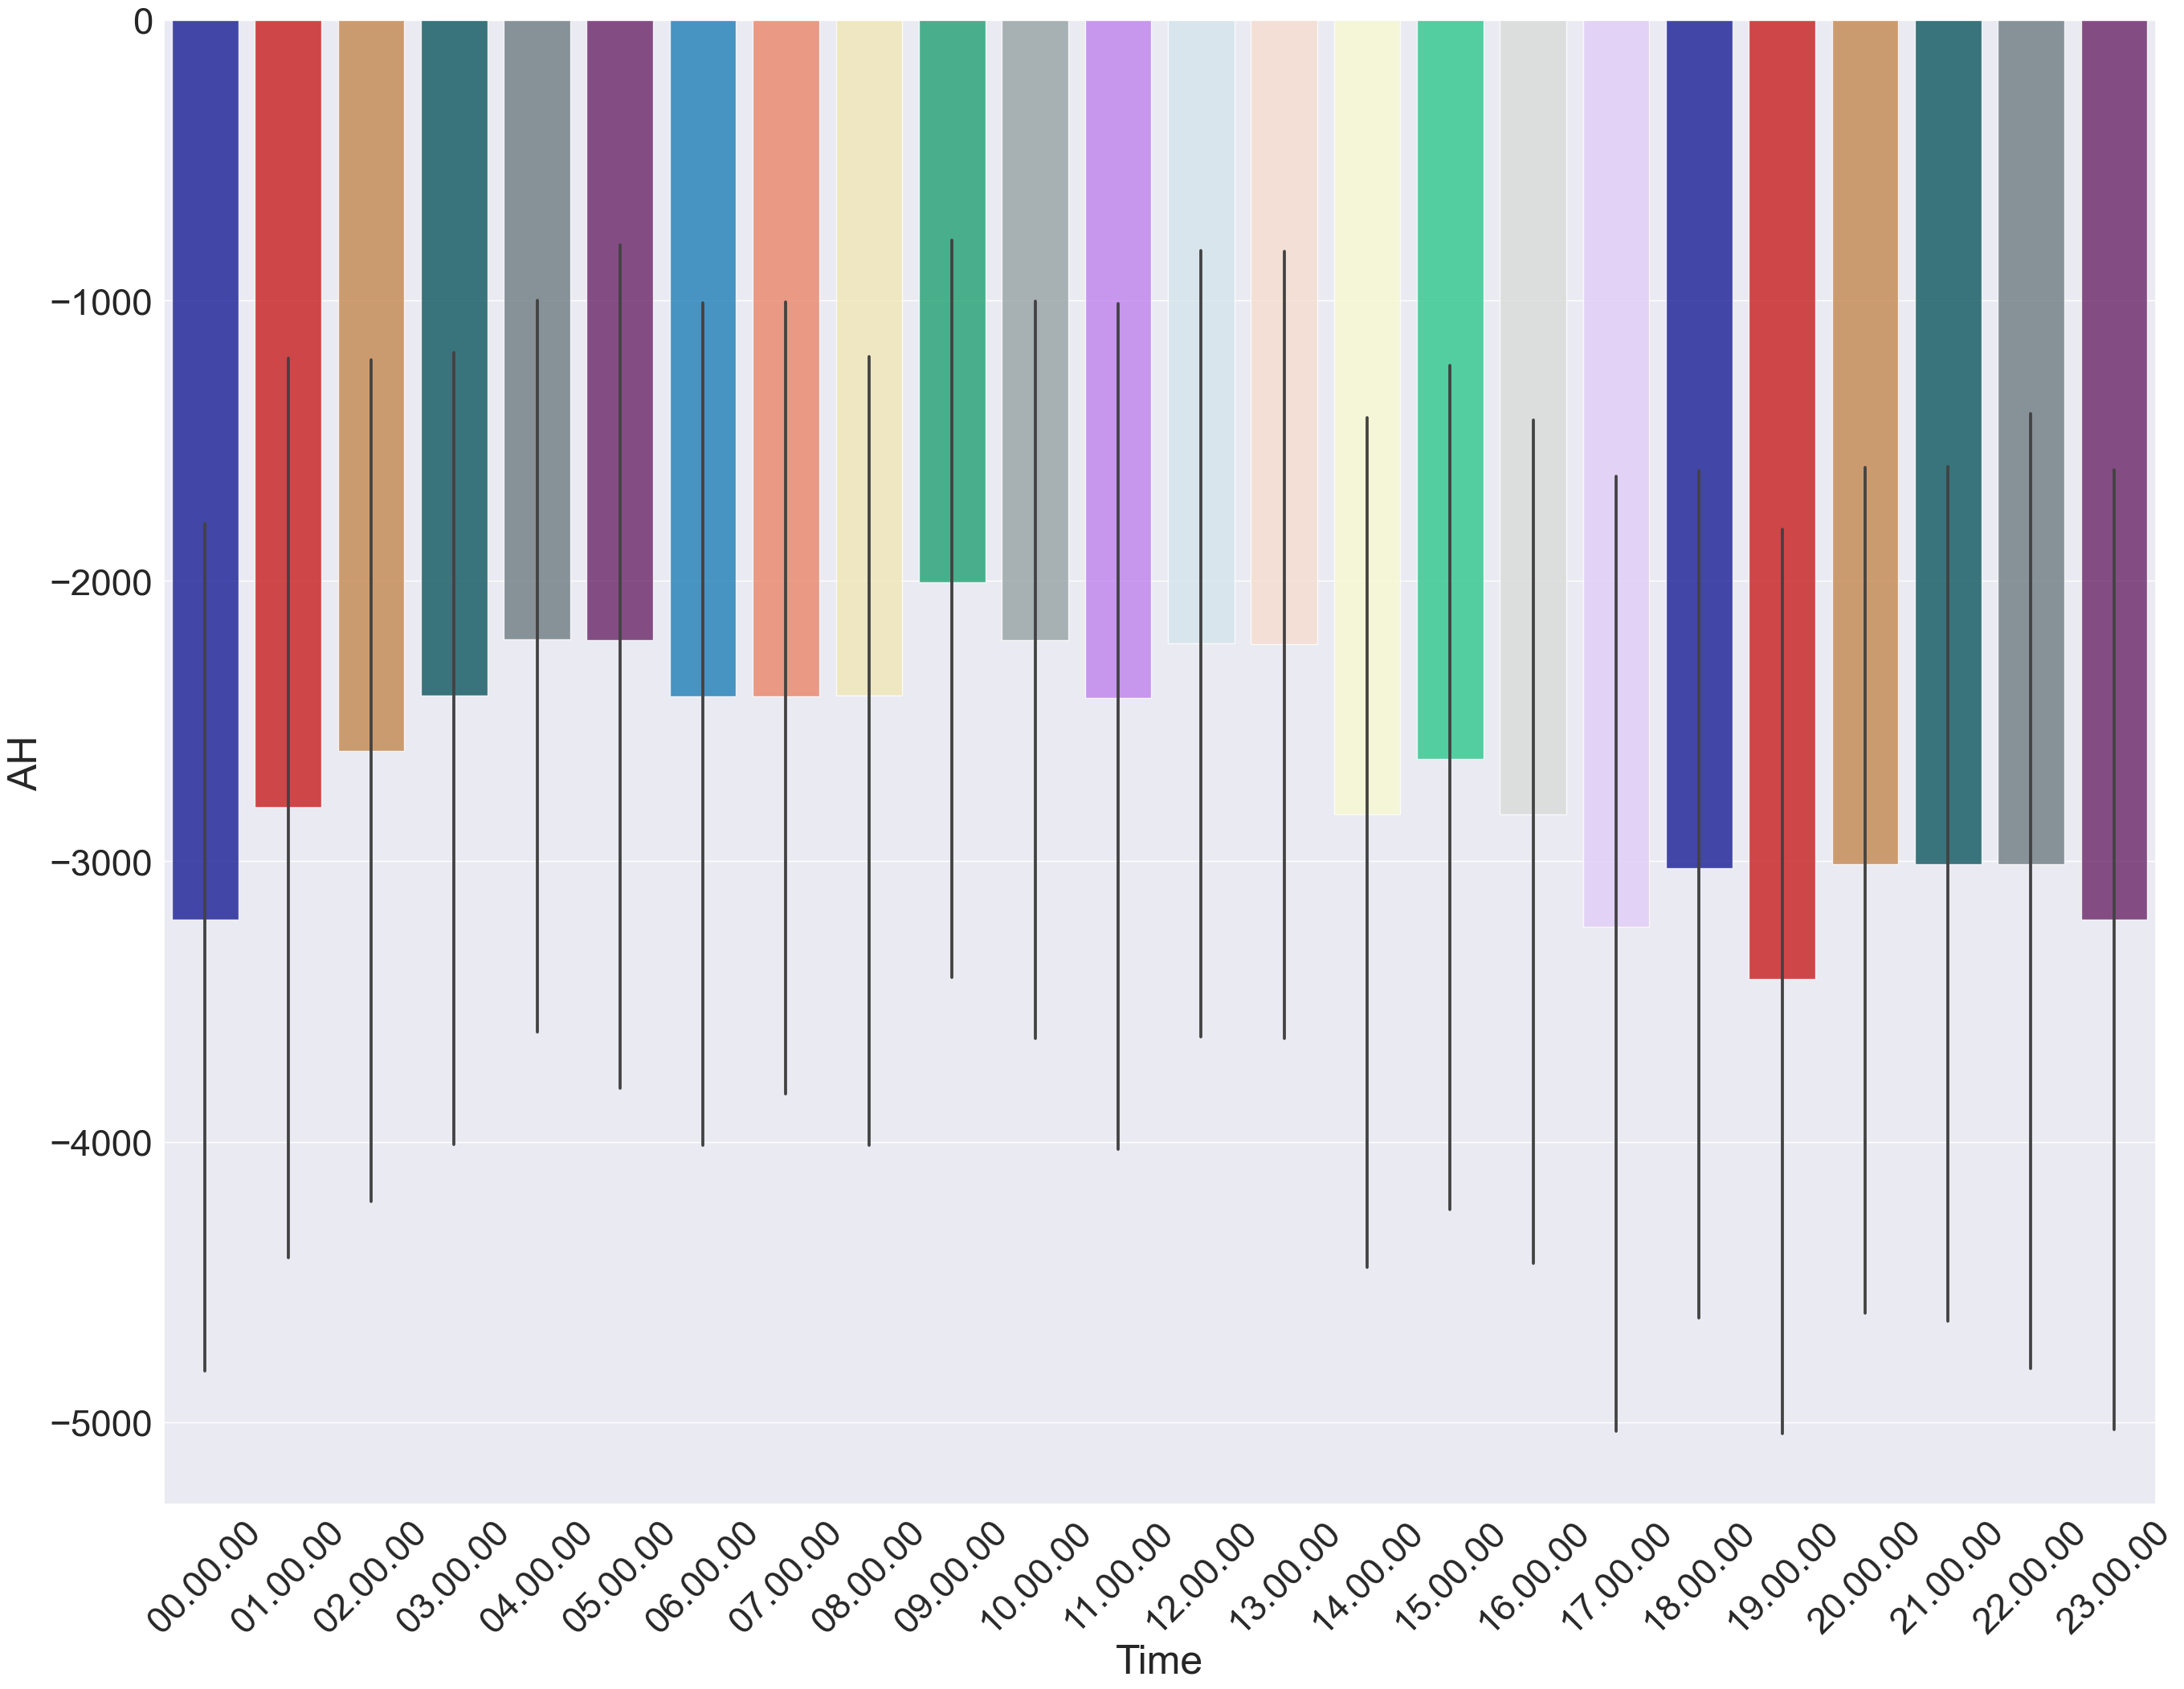

In [27]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='Time',y='AH',data=donnees.sort_values('Time'),
                       palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

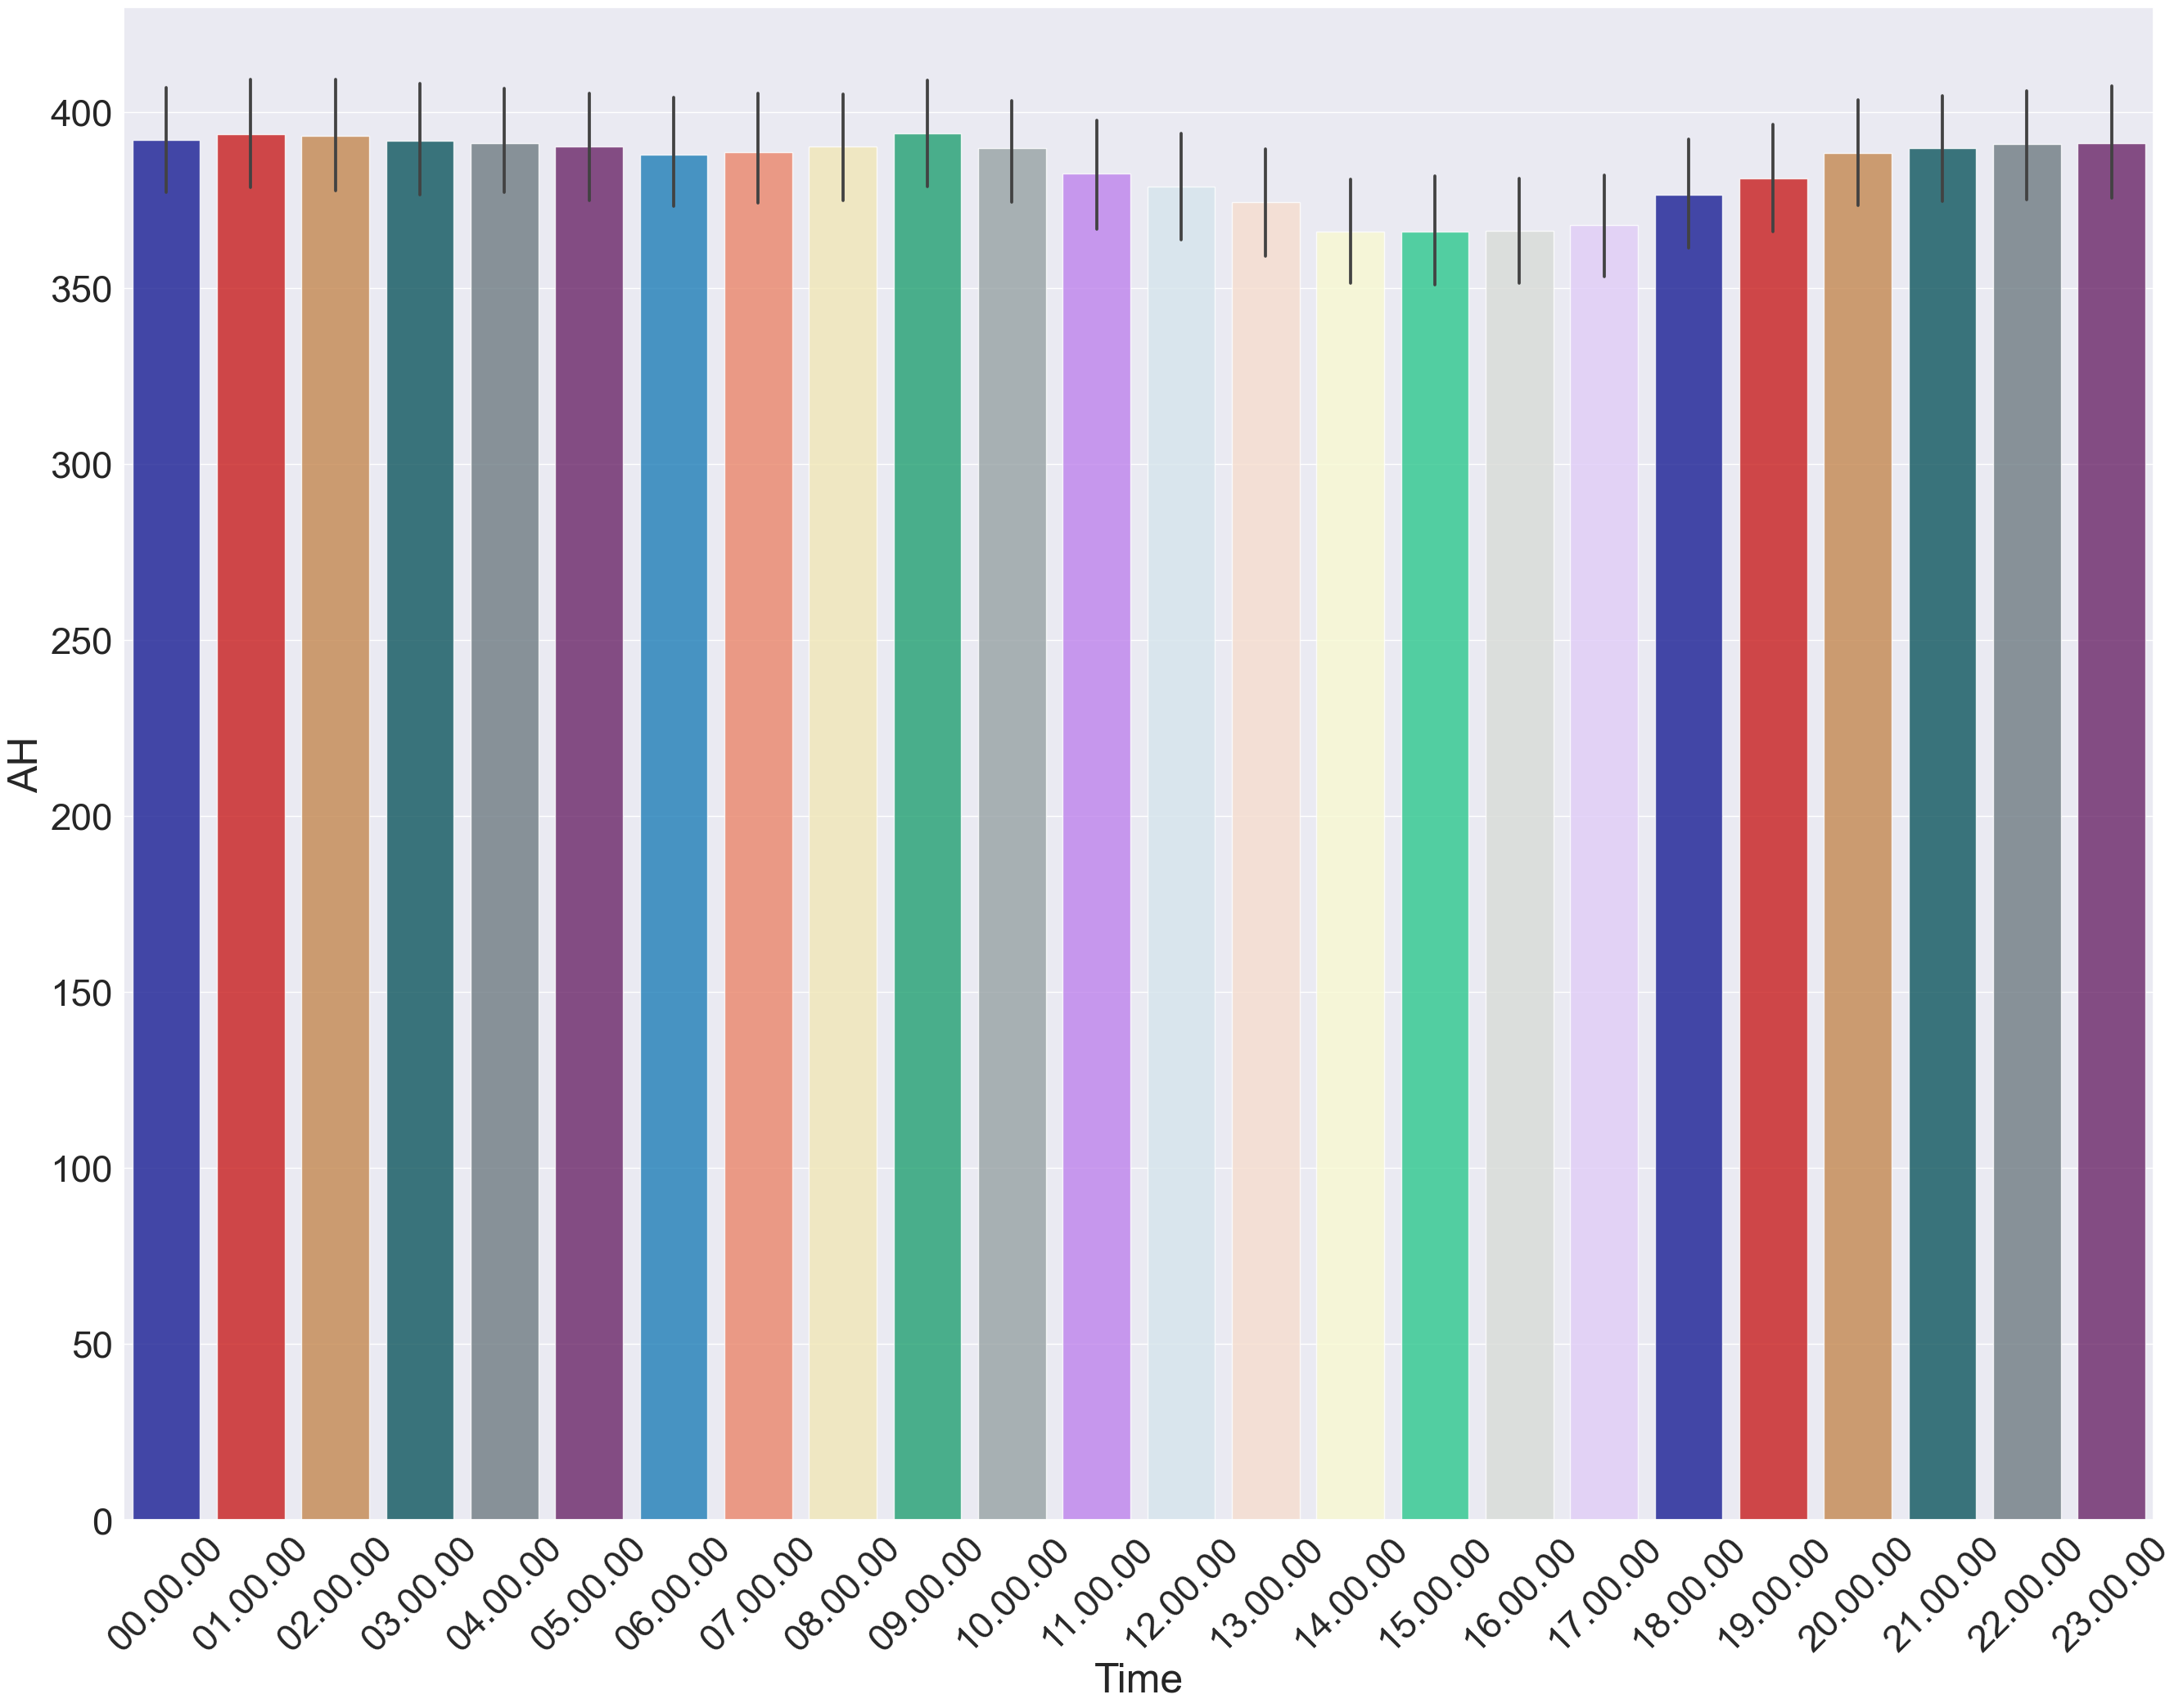

In [30]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='Time',y='AH',data=donnees[donnees['AH']!= -200].sort_values('Time'),
                       palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

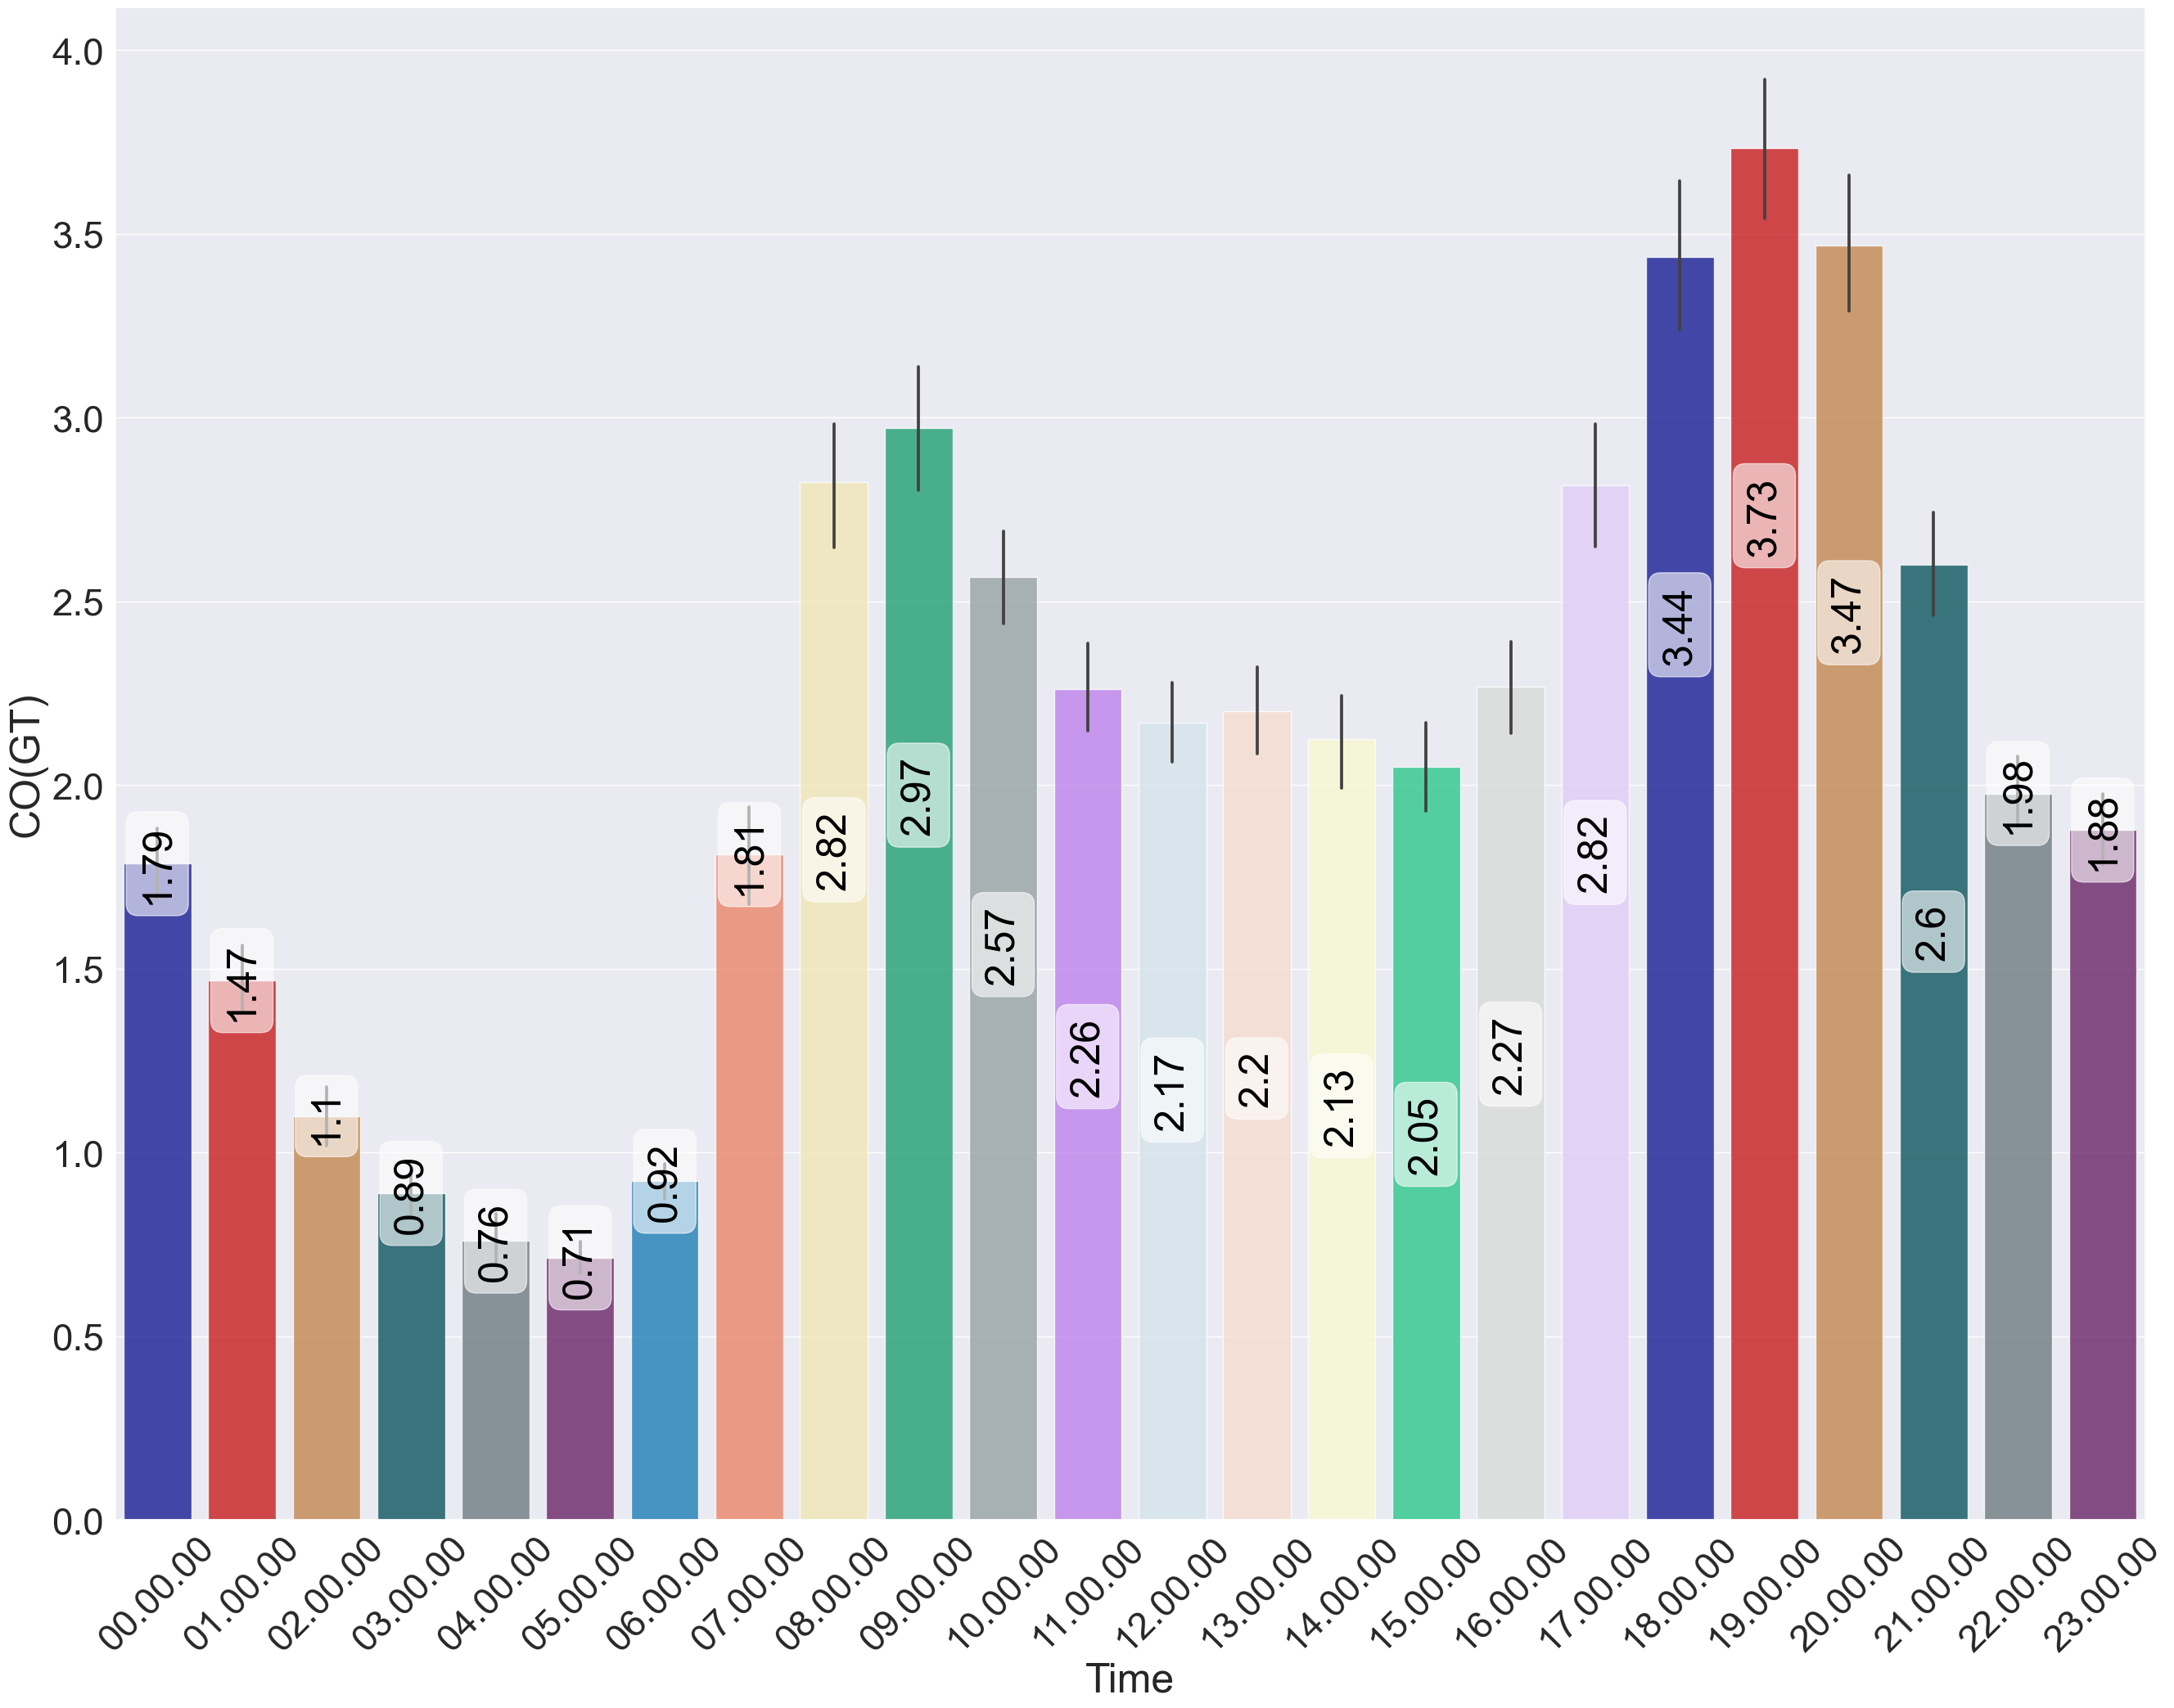

In [29]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='Time',y='CO(GT)',data=donnees[donnees['CO(GT)']!= -200].sort_values('Time'),
                       palette=palette, alpha=0.8, estimator='mean')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees[donnees['CO(GT)']!= -200].groupby('Time')['CO(GT)'].mean().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//2,
                round(nb,2),
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
    

In [ ]:
donnees.groupby(['pays']).agg({'quantites':['sum','mean','std']}).head(10)

In [ ]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='quantites',data=donnees, palette=palette, alpha=0.8, estimator=np.std)
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

In [ ]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='quantites',data=donnees, palette=palette, alpha=0.8, estimator=np.std)
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);


for i,nb in enumerate(donnees.groupby('pays').quantites.std().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//2,
                round(nb,2),
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

# CatPlot

In [ ]:
donnees.groupby(['pays','annee']).agg({'port':['mean','std']}).head(10)

In [ ]:
graph = sns.catplot(x="pays", 
                    y="port", 
                    hue=donnees['annee'].astype(str),
                    data=donnees,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette=palette,
                    legend=False);

graph.despine(left=True);
graph.set_xticklabels(rotation=90);
graph.set_xlabels('');
# graph.set_ylabels('');
plt.legend(loc='upper right', title_fontsize=20, fontsize=20);

# CountPlot

In [ ]:
donnees.groupby(['pays']).agg({'port':['count']})

In [ ]:
plt.figure(figsize=(32,24))
graph = sns.countplot(x='pays',
                      data=donnees, 
                      order=donnees.pays.sort_values().unique(),
                      palette=palette);

for i,nb in enumerate(donnees.groupby('pays').port.count().sort_index().values):
    graph.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
    
graph.set_xticklabels(donnees.pays.sort_values().unique(),rotation=90);

In [ ]:
plt.figure(figsize=(32,24))
graph = sns.countplot(x='categorie',
                      data=donnees.sort_values('categorie'), 
                      palette=palette);
graph.set_xticklabels(donnees.sort_values('categorie').categorie.unique(),rotation=90);

In [ ]:
plt.figure(figsize=(32,24))
graph = sns.countplot(x='categorie',
                      hue=donnees.sort_values('categorie')['annee'].astype(str),
                      data=donnees.sort_values('categorie'), 
                      palette=palette);

graph.set_xticklabels(donnees.sort_values('categorie').categorie.unique(),rotation=90);

# BoxPlot

In [ ]:
plt.figure(figsize=(36,24))
sns.boxplot(x='quantites',y='categorie',data=donnees,hue='annee', palette=palette);

In [ ]:
plt.figure(figsize=(36,24))
sns.boxplot(x='mois',y='ca', hue='annee', data=donnees, palette=palette);

# ScatterPlot

In [ ]:
plt.figure(figsize=(36,24))
sns.scatterplot(x     = 'quantites',
                y     = 'port',
                hue   = 'categorie', 
                data  = donnees,
                s     = 200,
                palette= palette,
                );

In [ ]:
d=donnees.groupby(['annee','pays']).agg({'port':['sum']}).reset_index()
d.columns=['annee','pays','port']
d.head()

In [ ]:
plt.figure(figsize=(36,24))
sns.scatterplot(x     = 'pays',
                y     = 'port',
                hue   = 'annee', 
                data  = d,
                s     = 200,
                palette= palette,
                );

In [ ]:
d.annee = d.annee.astype("category")

In [ ]:
d.pays = d.pays.astype("category")

In [ ]:
d.plot.scatter(x = 'pays',y = 'port',c='annee',figsize=(32,24), alpha=0.9, s=200, cmap=plt.cm.get_cmap('RdYlBu'))
plt.xticks(rotation = 90);

# LinePlot

In [ ]:
plt.figure(figsize=(24,12))

ax = sns.lineplot(x  ='pays',
                  y  ='port',
                  hue='annee',             
                  data=d, 
                  estimator=None, 
                  lw=1, 
                  ci=None, 
                  palette= palette);
ax.set_xticklabels(d.pays,rotation=90);

# LinePlot ScaterPlot

In [ ]:
donnees.assign(
                 annee_mois = donnees.annee.astype('str')+donnees.mois.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'quantites':['mean']
                                 }).head(10)

In [ ]:
calcul = donnees.assign(
                 annee_mois = donnees.annee.astype('str')+donnees.mois.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'quantites':['mean']
                                 }).reset_index()
calcul.columns = ['annee_mois','quantites']


plt.figure(figsize=(24,12))

graph = sns.lineplot( x         = "annee_mois", 
                      y         = "quantites", 
                      data      = calcul, 
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
#                       label     = nom,
                      color     = palette[0])
sns.scatterplot( x     = "annee_mois", 
                     y     = "quantites", 
                     data  = calcul, 
                             alpha =  0.8,   
                     s     = 200,
        #              ci    = None, 
                     color = palette[1],
                     ax    = graph,
                         );
                             
graph.set_xlabel('');
graph.set_ylabel('');    
graph.set_xticklabels(calcul.annee_mois,rotation=90);

# PairPlot

In [ ]:
sns.pairplot(data=donnees.drop(columns='mois'),hue='annee',size=10,palette=palette);

In [ ]:
sns.pairplot(data=donnees.drop(columns=['annee','mois']),hue='pays',size=10,palette=palette);

In [ ]:
sns.pairplot(data=donnees.drop(columns=['annee','mois']),hue='categorie',size=10,palette=palette);

# Pandas Visualisation

In [ ]:
meteo = pd.read_parquet('../donnees/meteo.gzip', engine='pyarrow')

In [ ]:
meteo.shape

In [ ]:
meteo.columns

In [ ]:
meteo[meteo.Nom == 'Strasbourg'].head()

In [ ]:
meteo[meteo.Nom == 'Strasbourg'].plot.line(x='DateHeure',y='Temperature',figsize=(100,30),lw=1)

In [ ]:
meteo[meteo.Nom == 'Strasbourg']\
     [meteo.AnneeMois == 201806].plot.line(x='DateHeure',y='Temperature',figsize=(18,14),lw=2)

In [ ]:
meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 201806].plot.scatter(x='Humidite',y='Pression',figsize=(20,20), alpha=0.9, s=200)

In [ ]:
meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 201806].plot.scatter(x='Humidite',y='Pression',c='Temperature',figsize=(20,20), alpha=0.9, s=200)

In [ ]:
meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 202306].plot.scatter(
    x='Humidite',y='Pression',c='Temperature',figsize=(20,20), alpha=0.9, 
    s=meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 202306]['Temperature']*20, cmap='coolwarm')

In [ ]:
meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 202306].plot.scatter(
    x='Humidite',y='Pression',figsize=(20,20), alpha=0.4, s=meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 202306]['Temperature']*20, color='navy');